## Alguns gráficos e customizações que vou explorar:
- Histograma
- Gráfico de barras com x categórico e y a contagem
- Mudar a cor
- Mudar os nomes do eixo x, eixo y e título
- Mudar o tamanho do gráfico, dos eixos e da legenda
- Gráfico de barras com eixo x e y
- Gráfico de linhas
- Heatmap

In [38]:
import pandas as pd
from plotnine import *
import numpy as np
from fitter import Fitter
from scipy.stats import logistic, probplot

In [39]:
fifa = pd.read_csv("fifa_sample_wsR.csv")

In [40]:
fifa.head()

Unnamed: 0  sofifa_id     short_name             long_name  age  height_cm   
0        1813     224599    Yan Junling                   颜骏凌   28        191  \
1       12287     243530         Mujaid    Mujaid Sadick Aliu   19        180   
2        4257     202676     A. Taggart          Adam Taggart   26        183   
3        8794     241187  L. Geertruida  Lutsharel Geertruida   18        180   
4        3851     193254     C. Trimmel   Christopher Trimmel   32        189   

   weight_kg  nationality                     club  wage_eur player_positions   
0         83     China PR         Shanghai SIPG FC     13000               GK  \
1         75        Spain   Deportivo de La Coruña      1000           CB, RB   
2         70    Australia  Suwon Samsung Bluewings      6000           ST, CF   
3         75  Netherlands                Feyenoord      1000      CB, CDM, RB   
4         82      Austria       1. FC Union Berlin     24000               RB   

  preferred_foot  
0          Right  
1          Right  
2          Right  
3          Right  
4          Right

In [41]:
fifa["wage_eur_bin"] = fifa["wage_eur"] <= 4000

## Gráficos de uma variável

## Histogramas

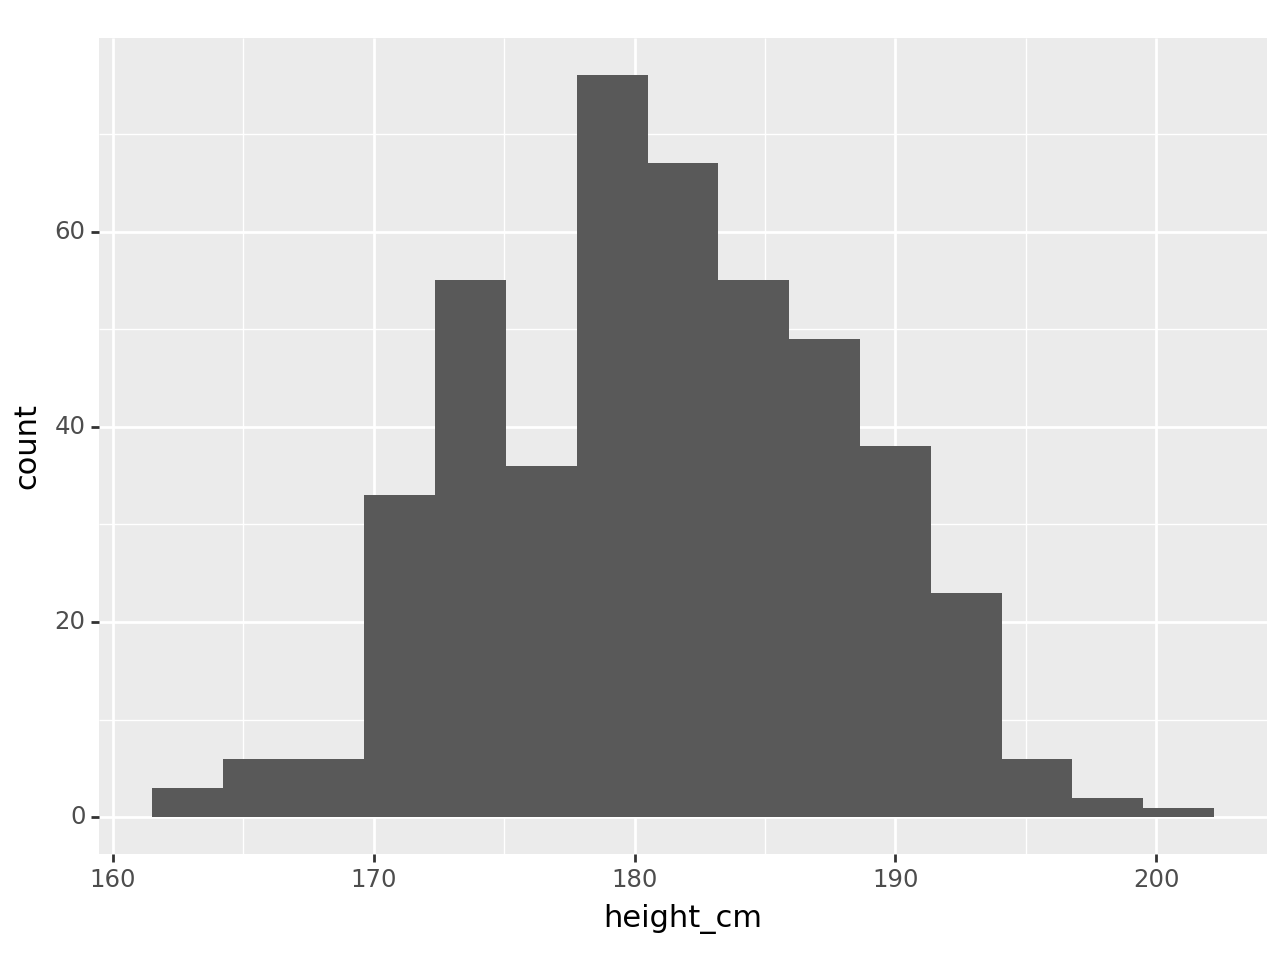

<Figure Size: (640 x 480)>

In [42]:
ggplot(fifa)+aes("height_cm")+geom_histogram(bins=15)

## Ajustando detalhes do histograma

## A componente que muda a cor dos histogramas se chama "fill" e o contorno de "color".

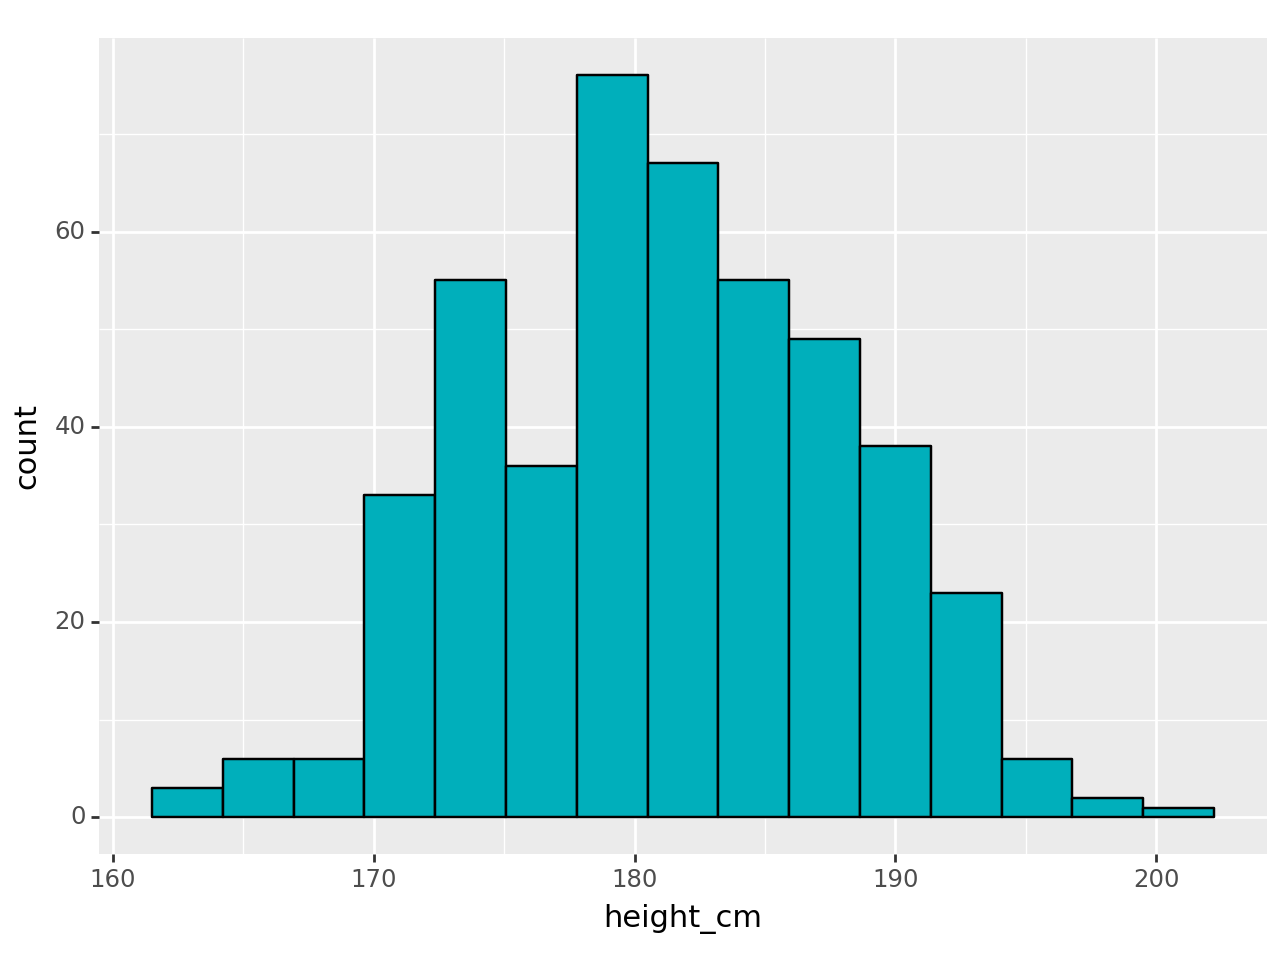

<Figure Size: (640 x 480)>

In [43]:
ggplot(fifa)+aes("height_cm")+geom_histogram(bins=15, fill="#00AFBB",color="black")

## O fundo de qualquer gráfico pode ser alterado através do "theme"
#### [Themes](https://ggplot2.tidyverse.org/reference/ggtheme.html)
- theme_classic()
- theme_light()
- theme_bw()
- theme_test()

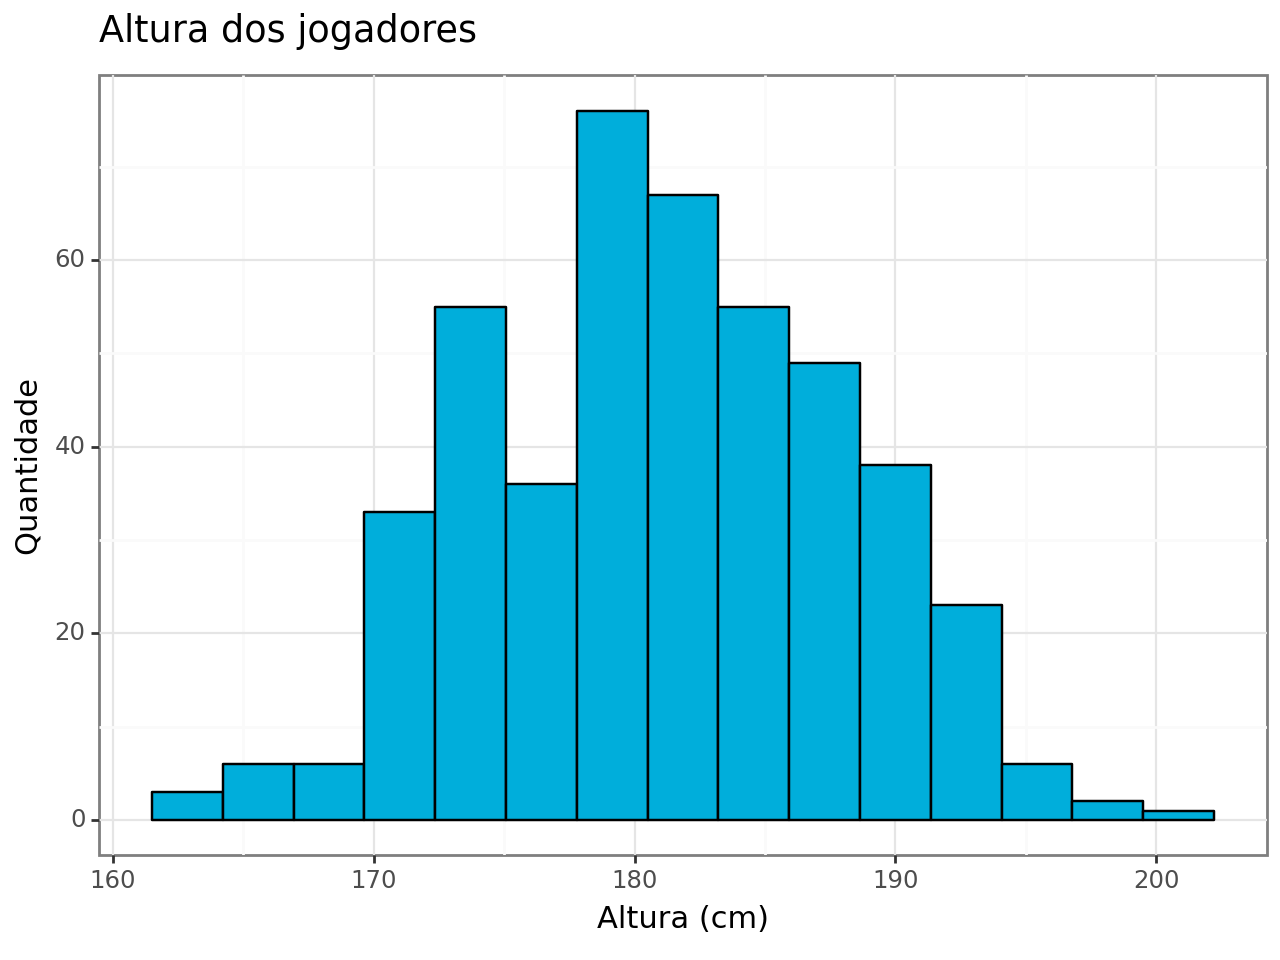

<Figure Size: (640 x 480)>

In [44]:
(ggplot(fifa)+aes("height_cm")+geom_histogram(bins=15, fill="#00aedb",color="black")
+theme_bw()+labs(y = "Quantidade", x = "Altura (cm)", title = "Altura dos jogadores"))

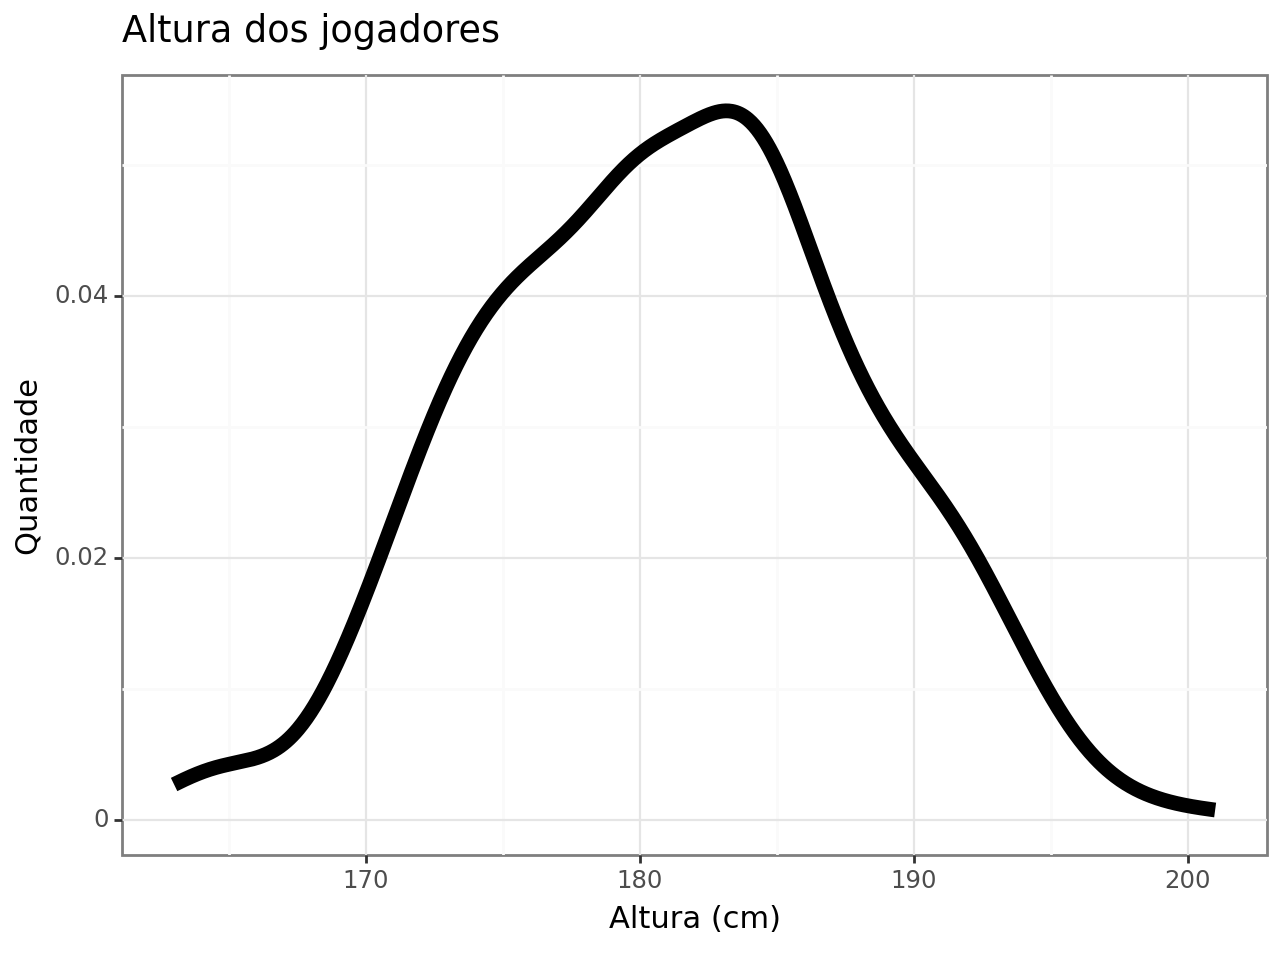

<Figure Size: (640 x 480)>

In [45]:
(ggplot(fifa)+aes("height_cm") + geom_density(size=3)+theme_bw()
+labs(y = "Quantidade", x = "Altura (cm)", title = "Altura dos jogadores"))

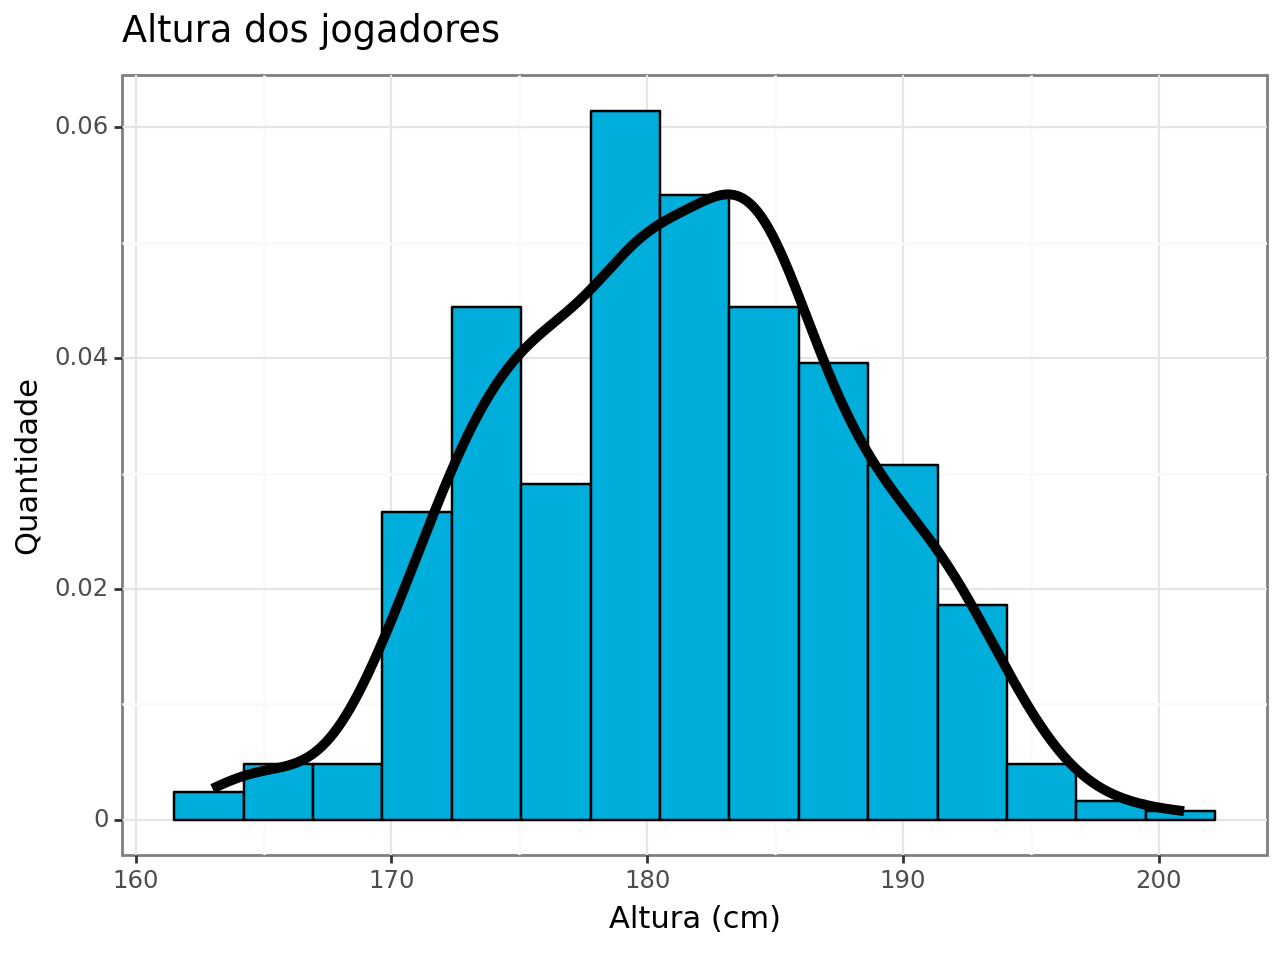

<Figure Size: (640 x 480)>

In [46]:
(ggplot(fifa)+aes("height_cm")+geom_histogram(aes(y = "..density.."), bins=15, fill="#00aedb",color="black")
 + geom_density(size=2)
+theme_bw()+labs(y = "Quantidade", x = "Altura (cm)", title = "Altura dos jogadores"))

In [47]:
f = Fitter(fifa["height_cm"], distributions=['logistic'])
f.fit()
est=f.fitted_param['logistic']

Fitting 1 distributions: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.92it/s]


C:\Users\alber\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 15'. Pick better value with 'binwidth'.


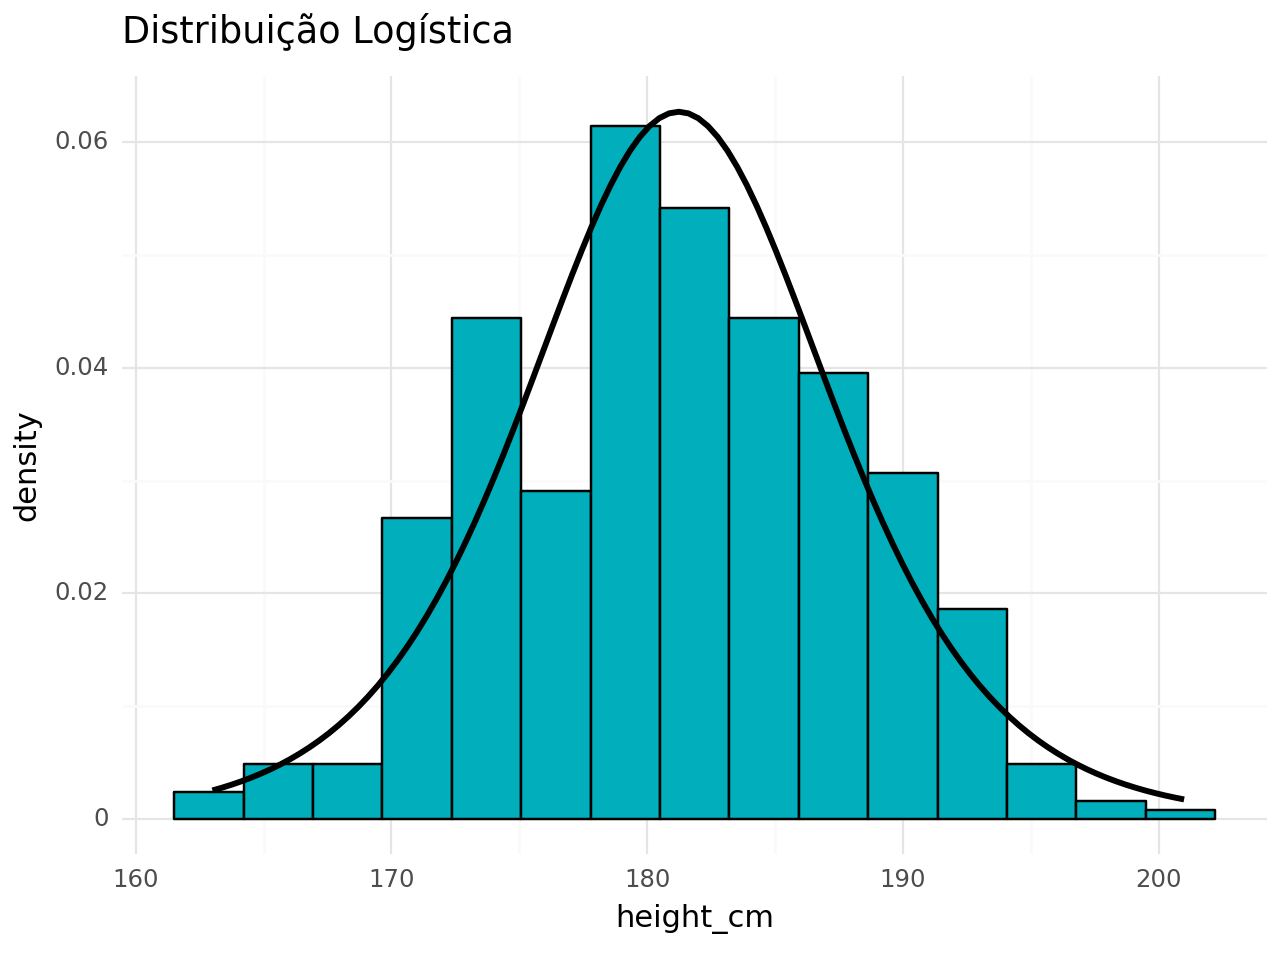

<Figure Size: (640 x 480)>

In [48]:
(ggplot(fifa, aes("height_cm"))+geom_histogram(aes(y ="..density.."),
        fill="#00AFBB",color="black")+
        stat_function(fun = logistic.pdf, args=dict(loc=est[0], scale=est[1]),size=1.2)+
        theme_minimal()+labs(title="Distribuição Logística"))

## Box plot

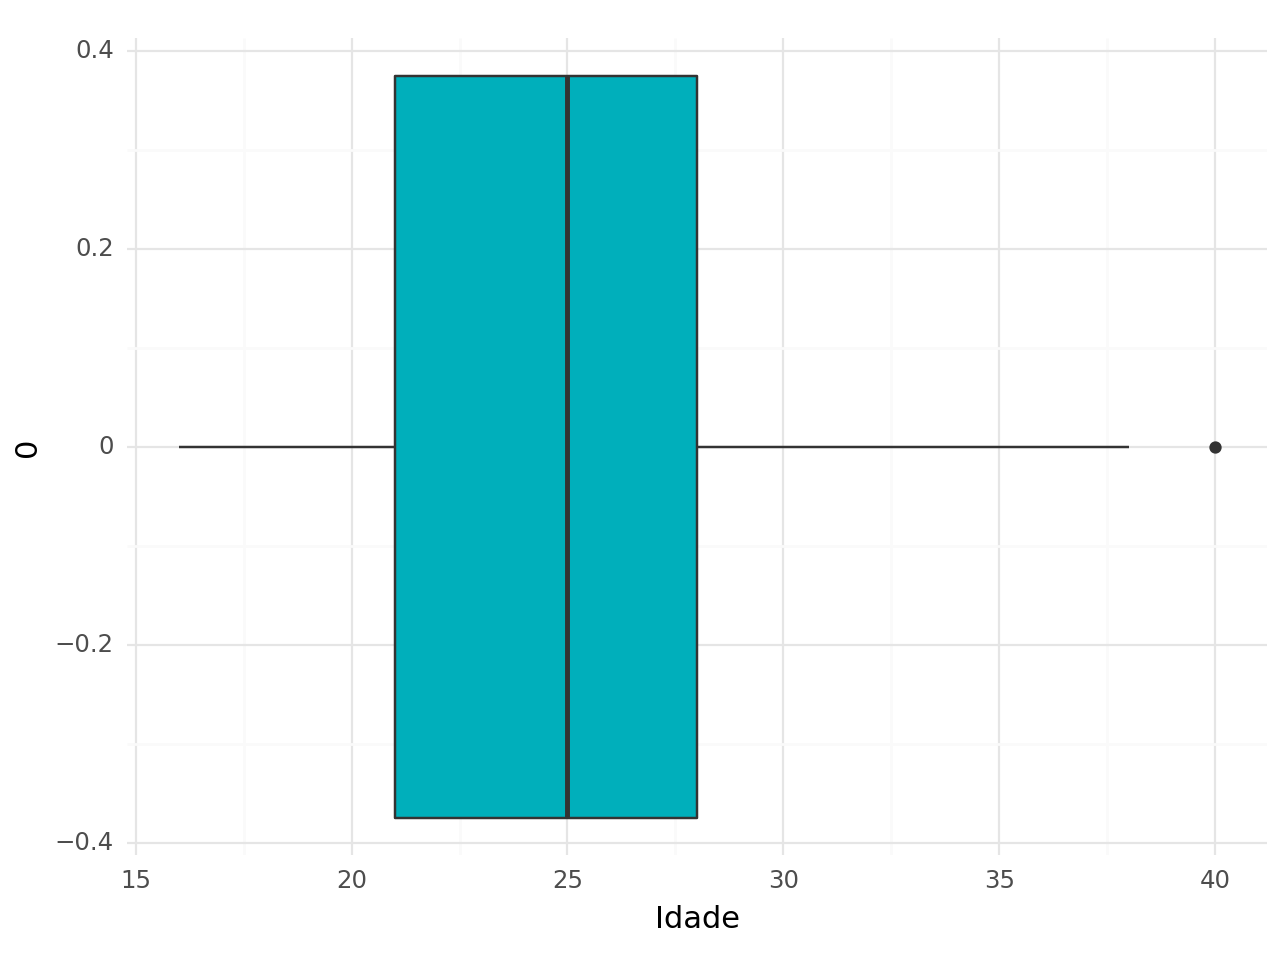

<Figure Size: (640 x 480)>

In [49]:
(ggplot(data = fifa) + aes(x=0, y="age") +
 geom_boxplot(fill="#00AFBB")+
 theme_minimal() + coord_flip() +
 labs(y="Idade")
)

## Trabalhando com variáveis categóricas

## Gráfico de barras

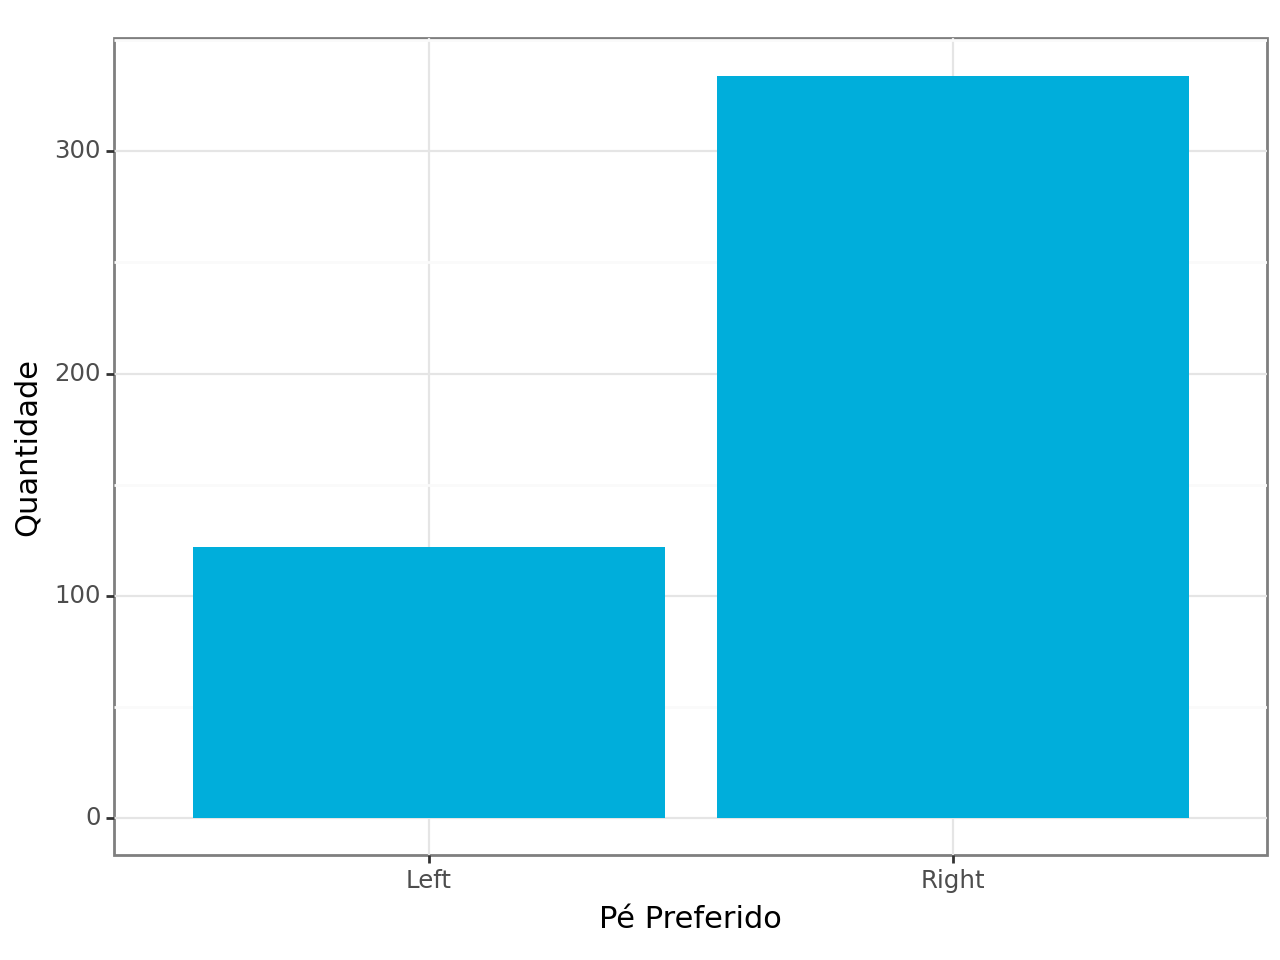

<Figure Size: (640 x 480)>

In [50]:
(ggplot(fifa)+aes("preferred_foot")+geom_bar(fill="#00aedb")+theme_bw()+
labs(y = "Quantidade", x = "Pé Preferido"))

## Ordenando usando o scale_x_discrete. Dá pra ordenar as barras do maior para o menor ou vice-versa usando essa função!

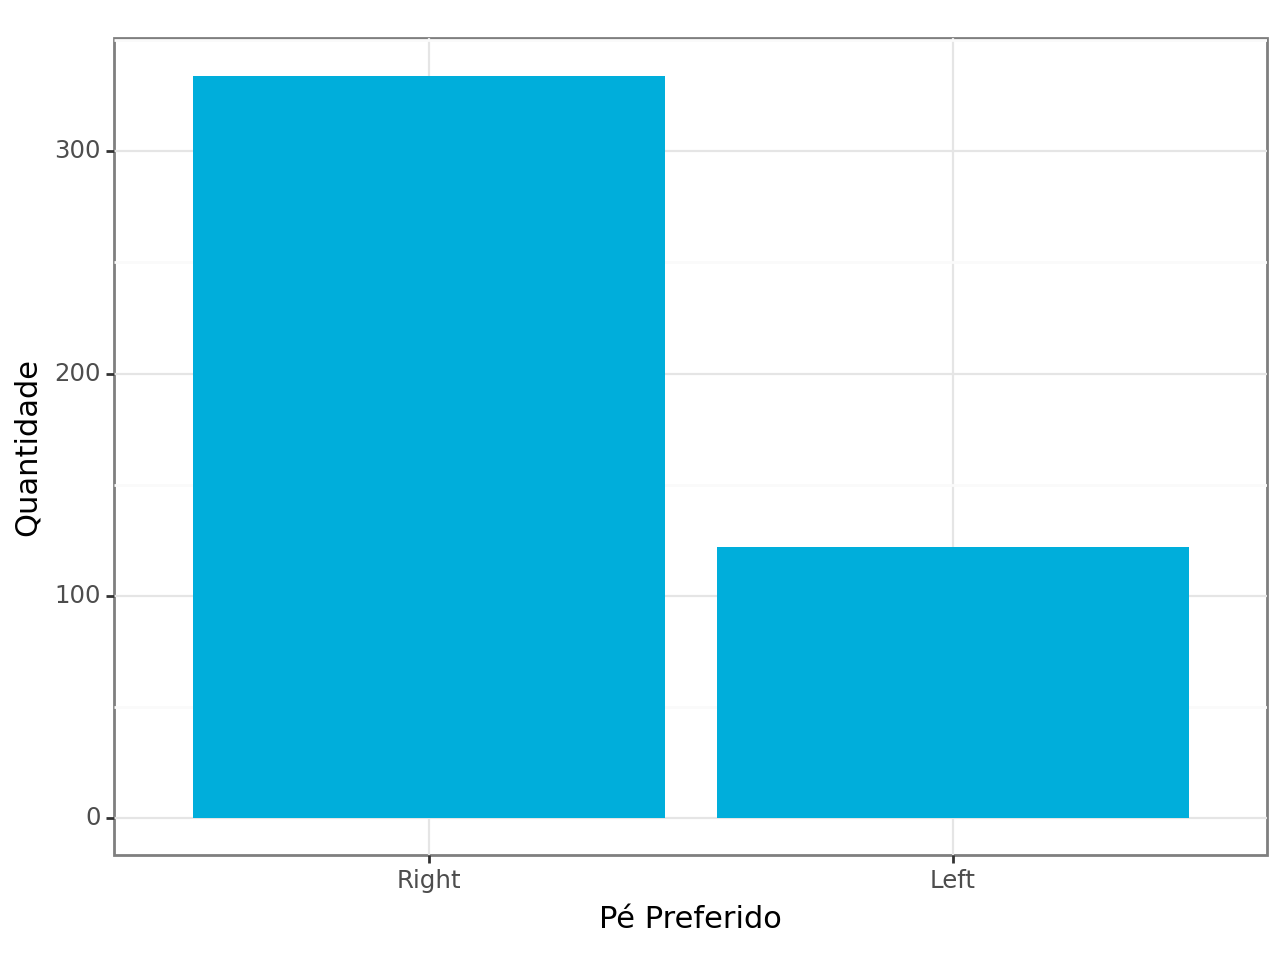

<Figure Size: (640 x 480)>

In [51]:
(ggplot(fifa)+aes("preferred_foot")+geom_bar(fill="#00aedb")+theme_bw()+
labs(y = "Quantidade", x = "Pé Preferido")
+ scale_x_discrete(limits=["Right", "Left"]))

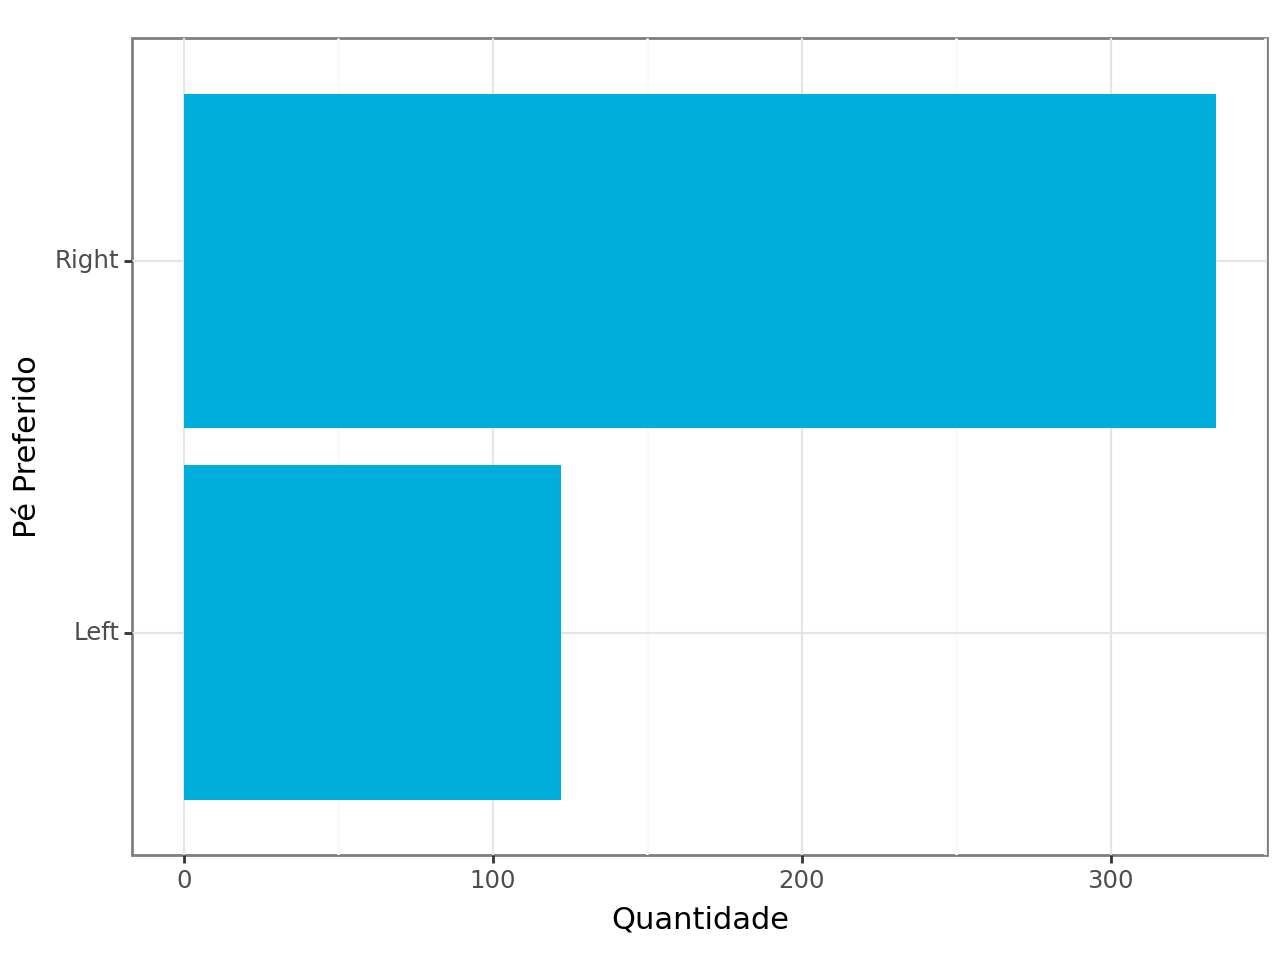

<Figure Size: (640 x 480)>

In [52]:
(ggplot(fifa)+aes("preferred_foot")+geom_bar(fill="#00aedb")+theme_bw()+ coord_flip() +
labs(y = "Quantidade", x = "Pé Preferido"))

### Gráfico de dispersão

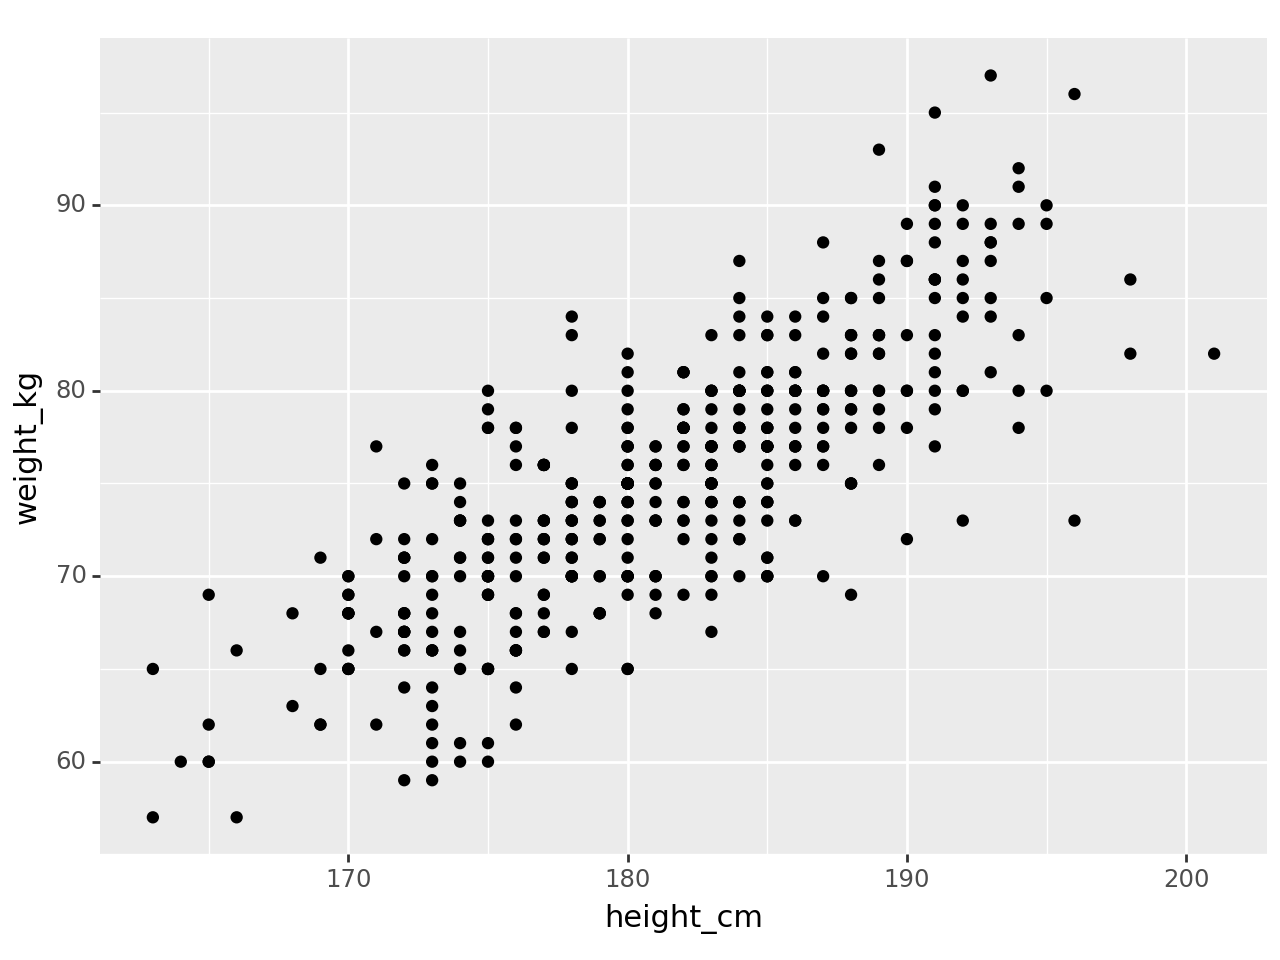

<Figure Size: (640 x 480)>

In [53]:
(ggplot(fifa) + aes(x="height_cm", y= "weight_kg") + geom_point())

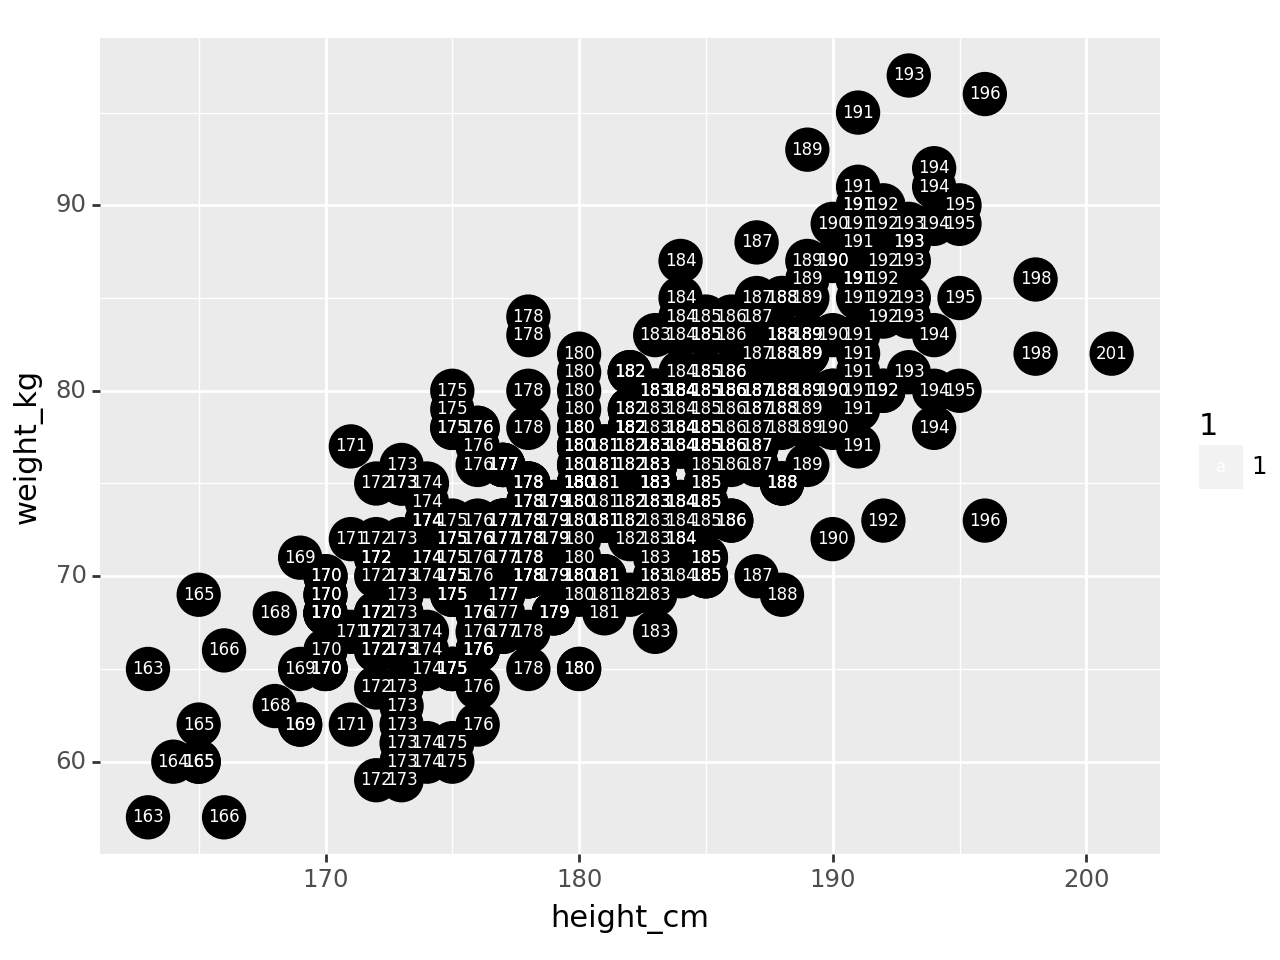

<Figure Size: (640 x 480)>

In [54]:
(ggplot(fifa) + aes(x="height_cm", y= "weight_kg") + geom_point(size=8)
+geom_text(aes(label = "height_cm", size=1), color="white"))

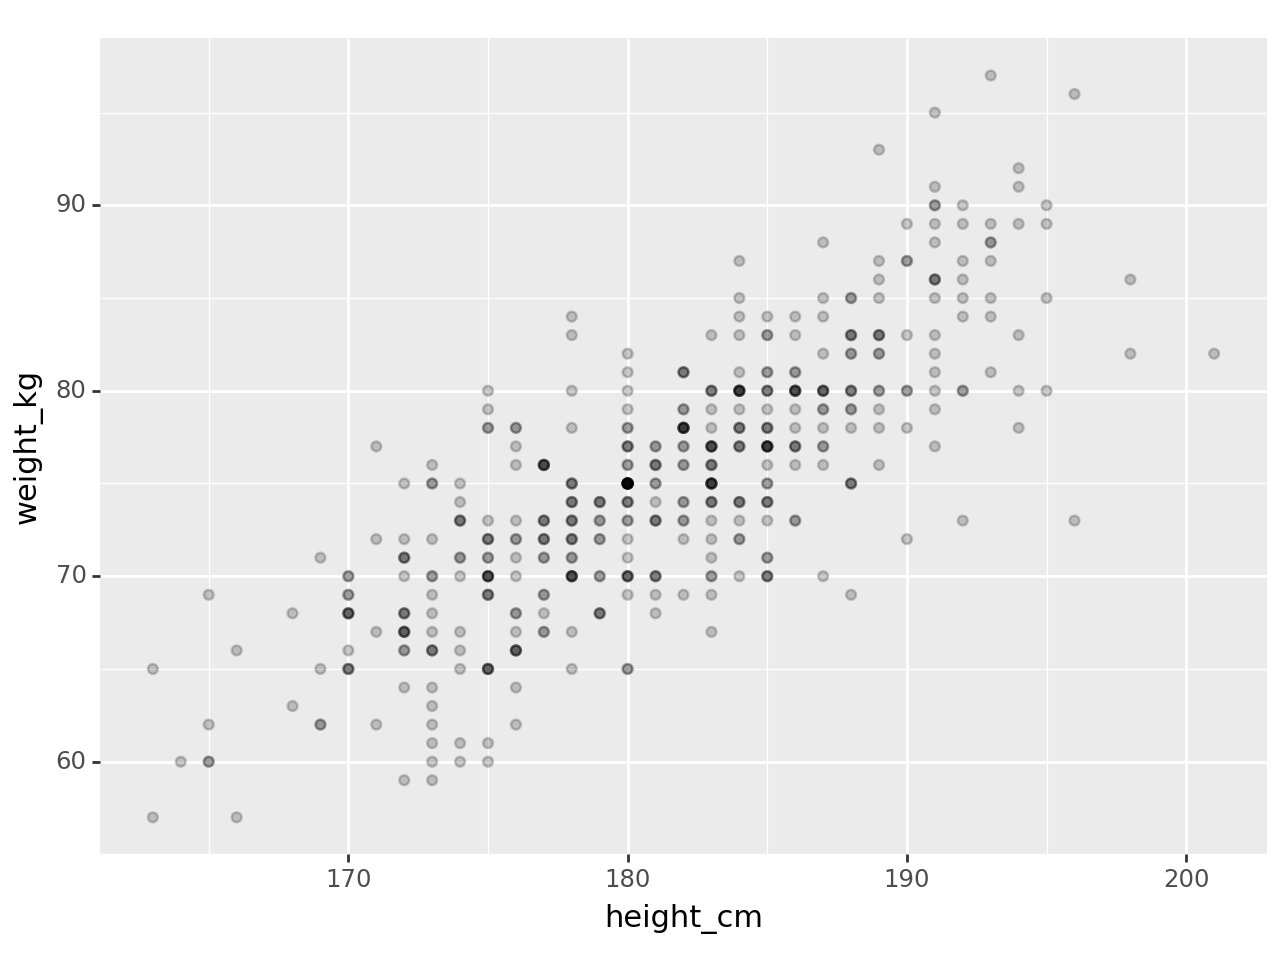

<Figure Size: (640 x 480)>

In [55]:
(ggplot(fifa) + aes(x="height_cm", y= "weight_kg") + geom_point(alpha=0.2))

C:\Users\alber\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 343 rows containing missing values.


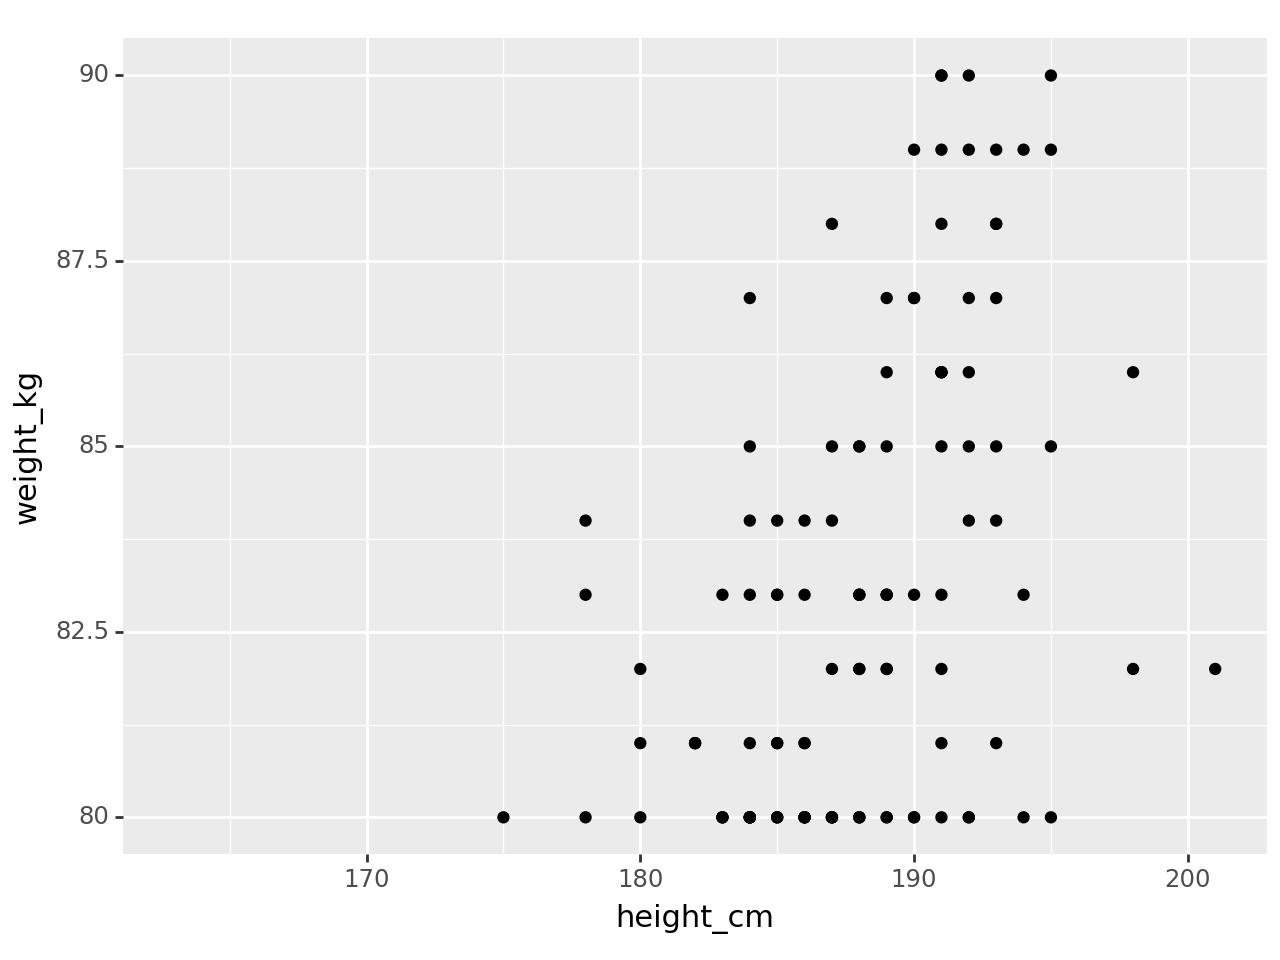

<Figure Size: (640 x 480)>

In [56]:
(ggplot(fifa) + aes(x="height_cm", y= "weight_kg") + geom_point()+ylim(80, 90))

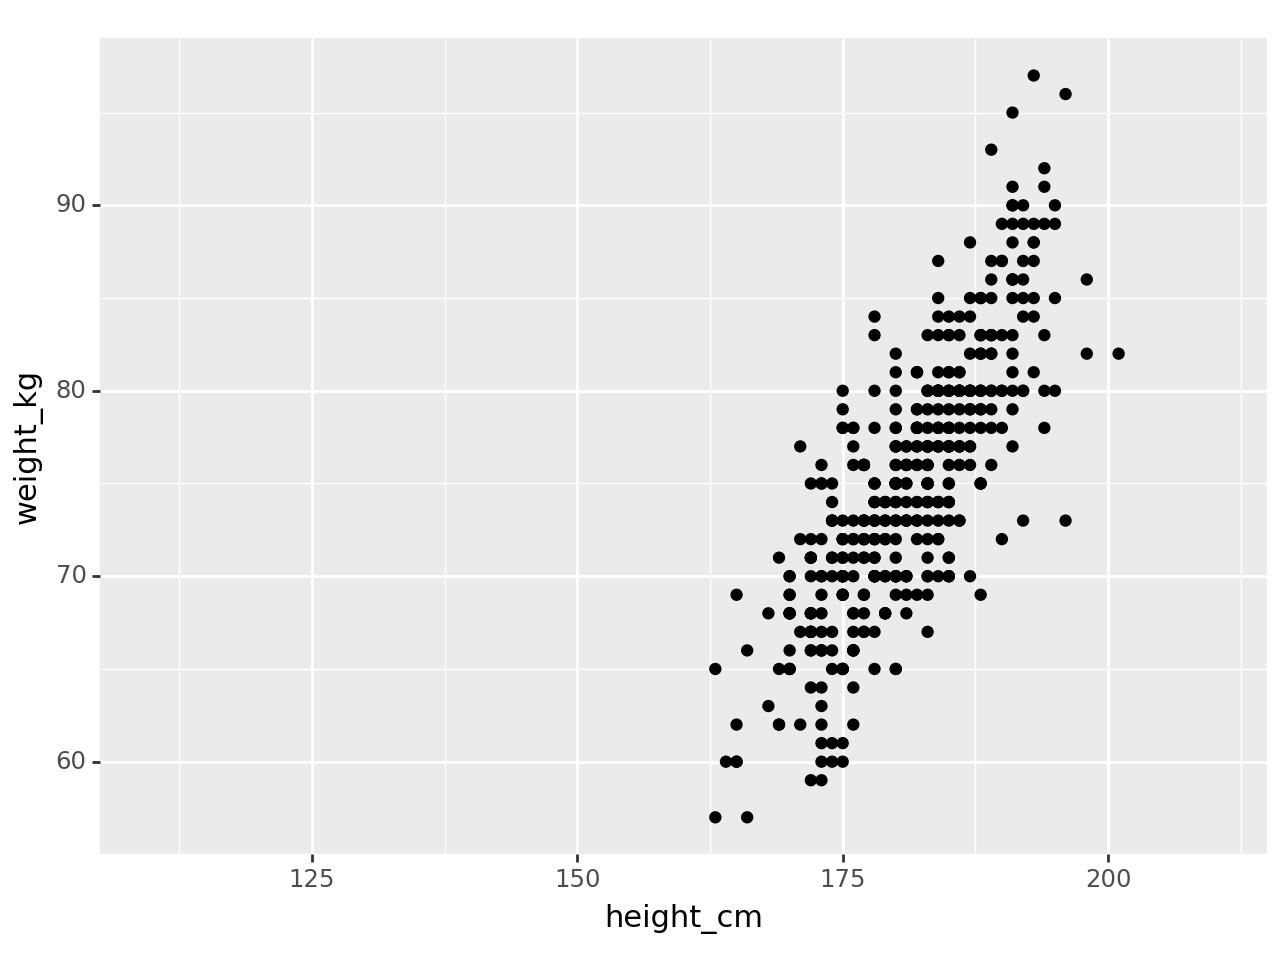

<Figure Size: (640 x 480)>

In [57]:
(ggplot(fifa) + aes(x="height_cm", y= "weight_kg") + geom_point()+xlim(110, 210))

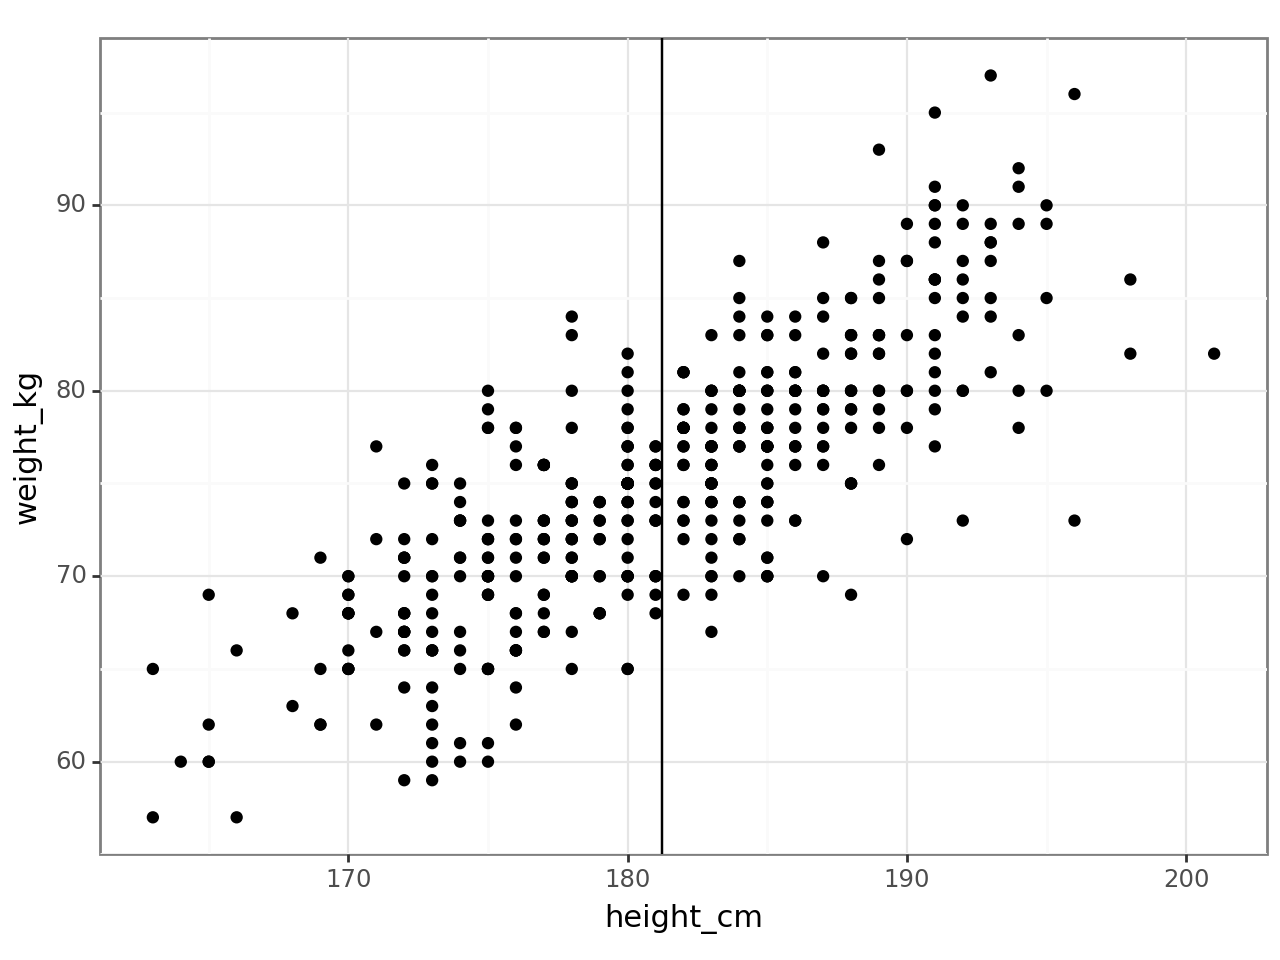

<Figure Size: (640 x 480)>

In [58]:
(ggplot(fifa) + aes(x="height_cm", y= "weight_kg") + geom_point()+theme_bw()
+geom_vline(xintercept = fifa["height_cm"].mean()))

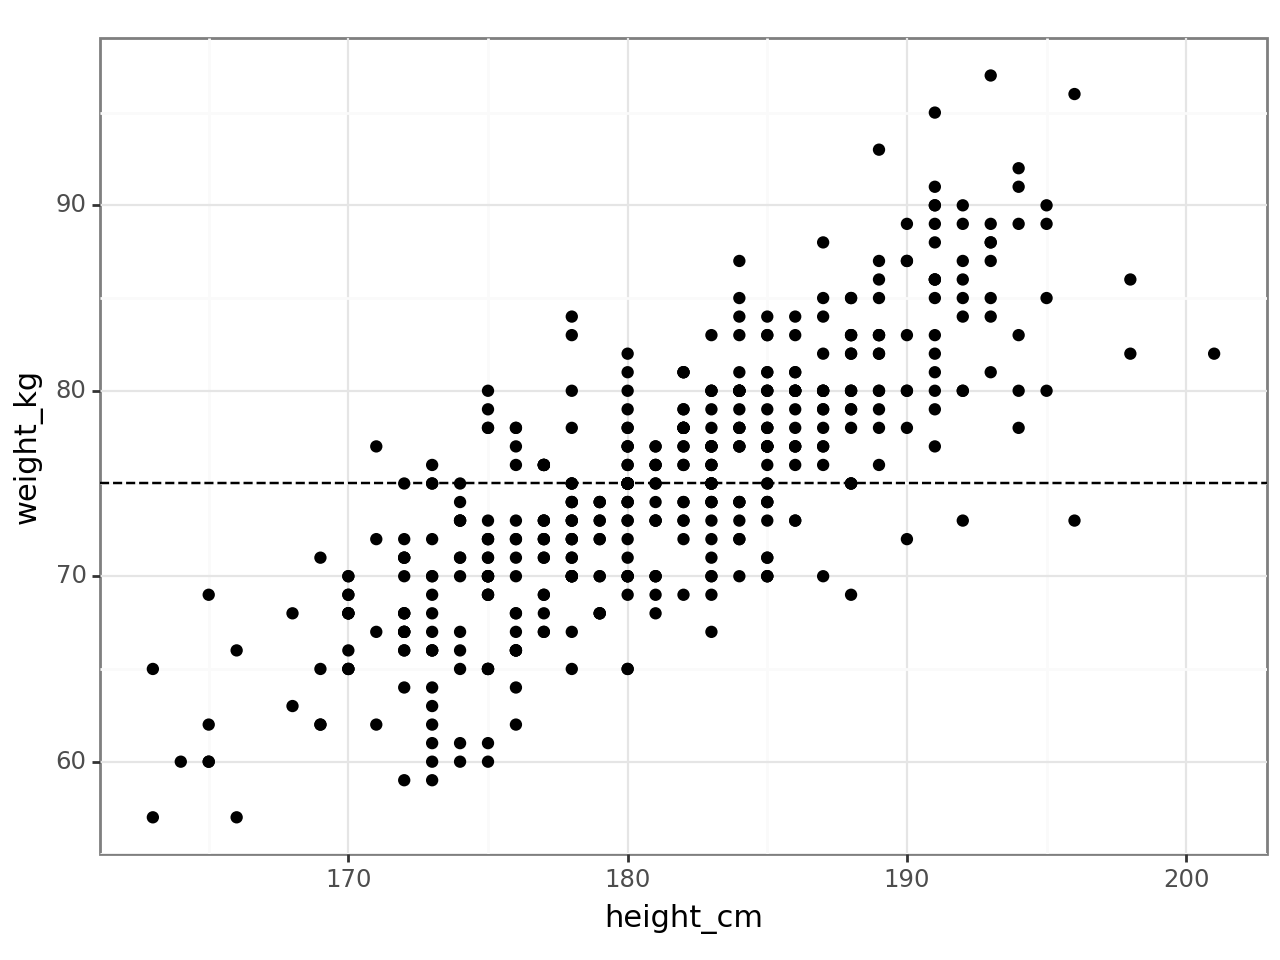

<Figure Size: (640 x 480)>

In [59]:
(ggplot(fifa) + aes(x="height_cm", y= "weight_kg") + geom_point()+theme_bw()
+geom_hline(yintercept = fifa["weight_kg"].median(), linetype = "dashed"))

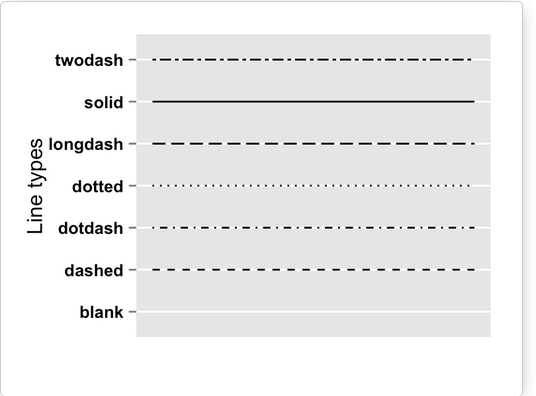

## Ajuste de uma regressão linear
 #### [Visualização e ajuste de modelos estatísticos](https://ggplot2.tidyverse.org/reference/geom_smooth.html)

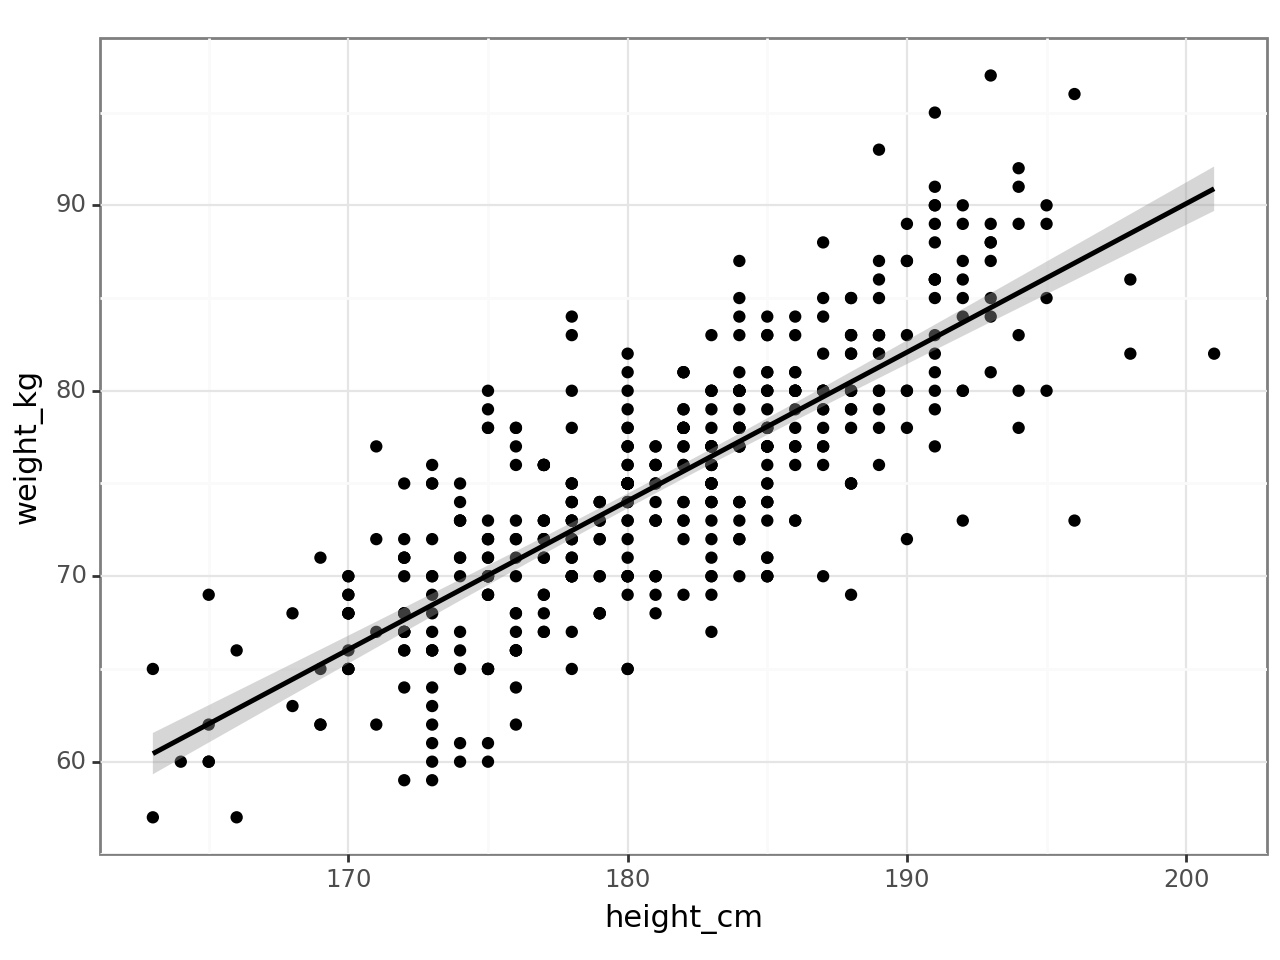

<Figure Size: (640 x 480)>

In [60]:
(ggplot(data = fifa) + aes(x = "height_cm", y = "weight_kg") + geom_point()
+theme_bw()
+ geom_smooth(method = "lm"))

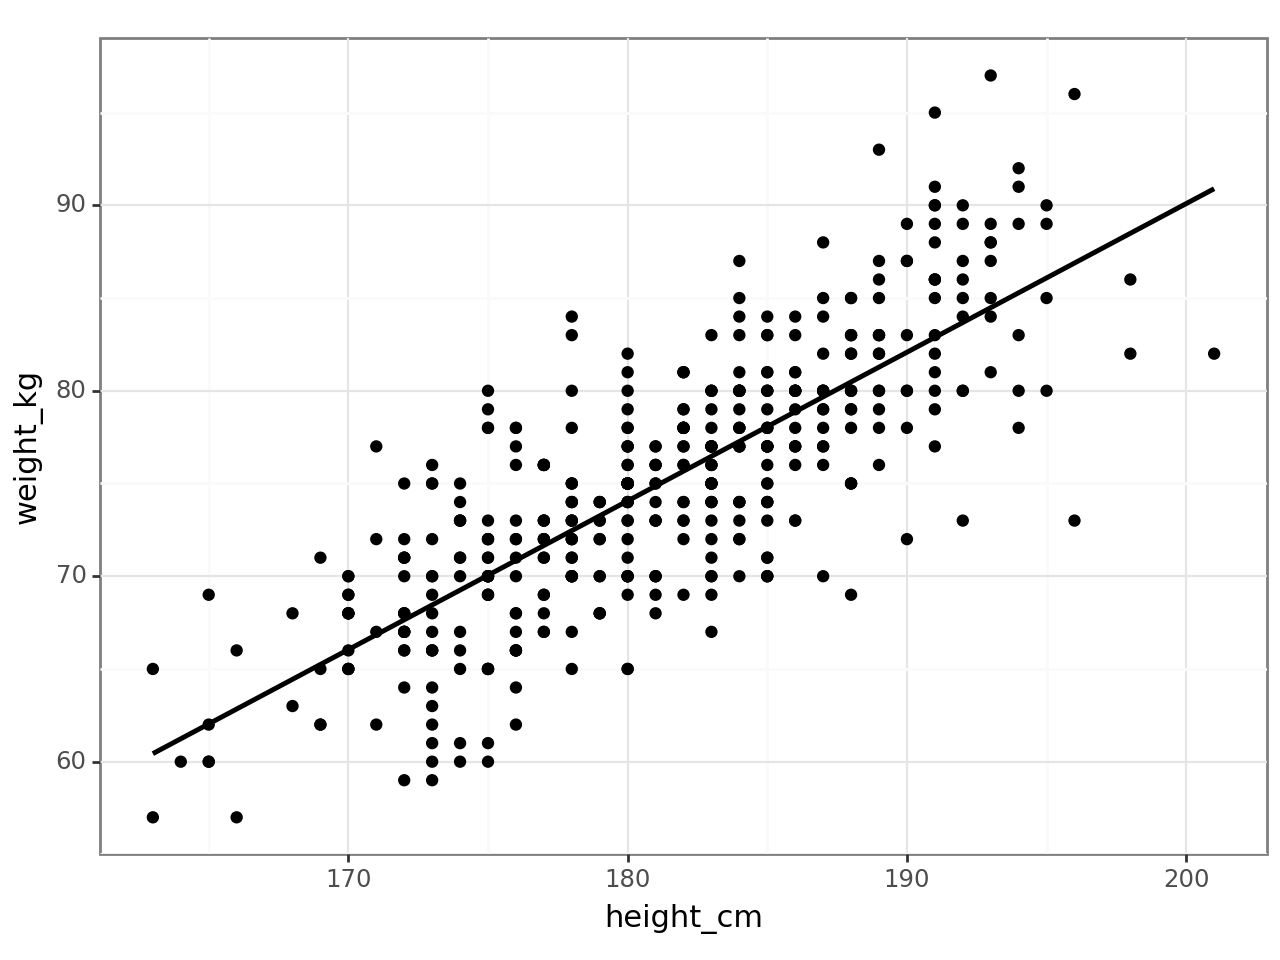

<Figure Size: (640 x 480)>

In [61]:
(ggplot(data = fifa) + aes(x = "height_cm", y = "weight_kg") + geom_point()
+theme_bw()
+ geom_smooth(method = "lm", se = False))

## Separando os dados pela cor dos pontos

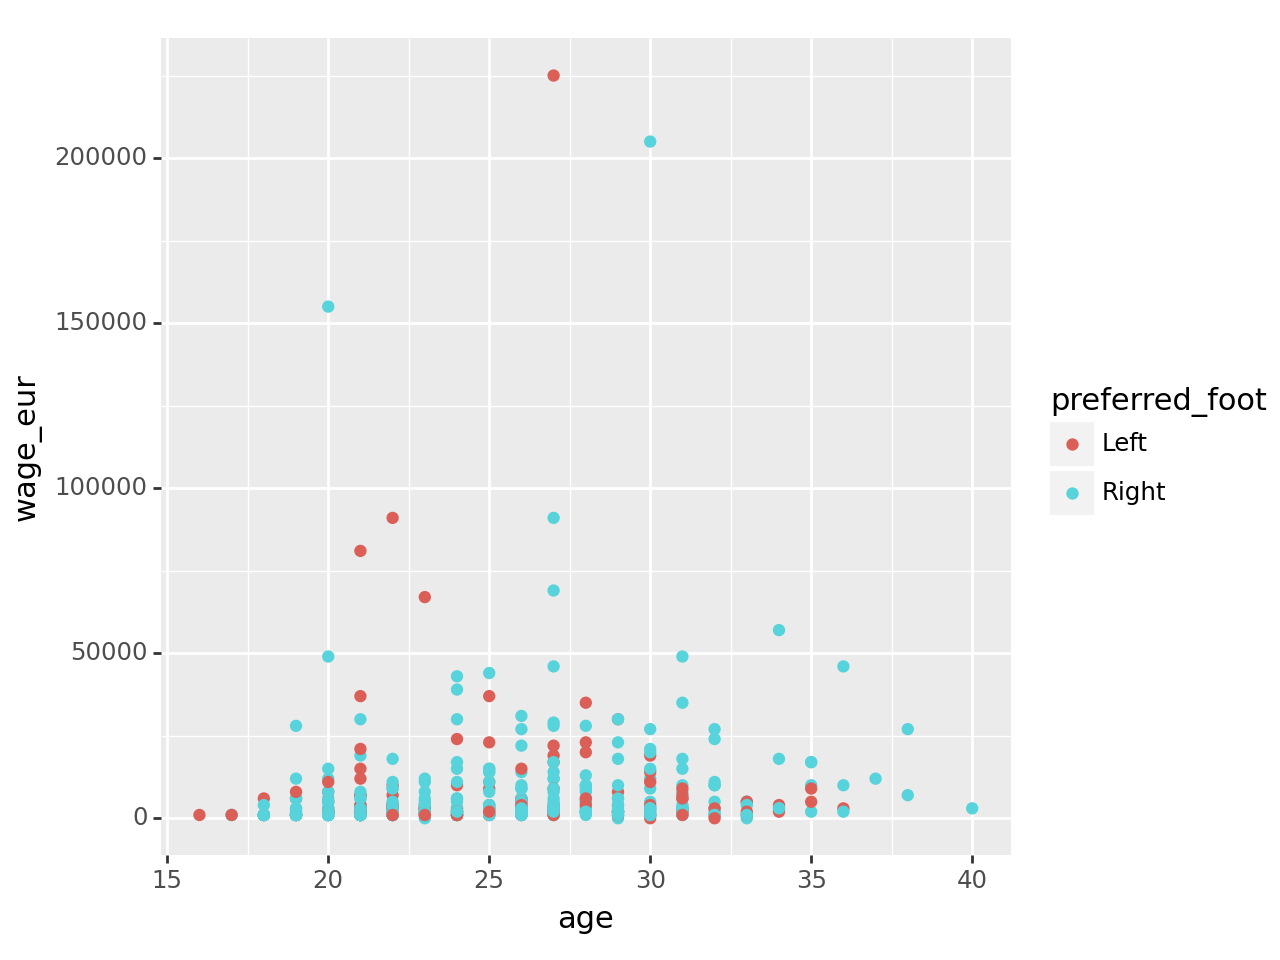

<Figure Size: (640 x 480)>

In [62]:
(ggplot(data = fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color = "preferred_foot")))

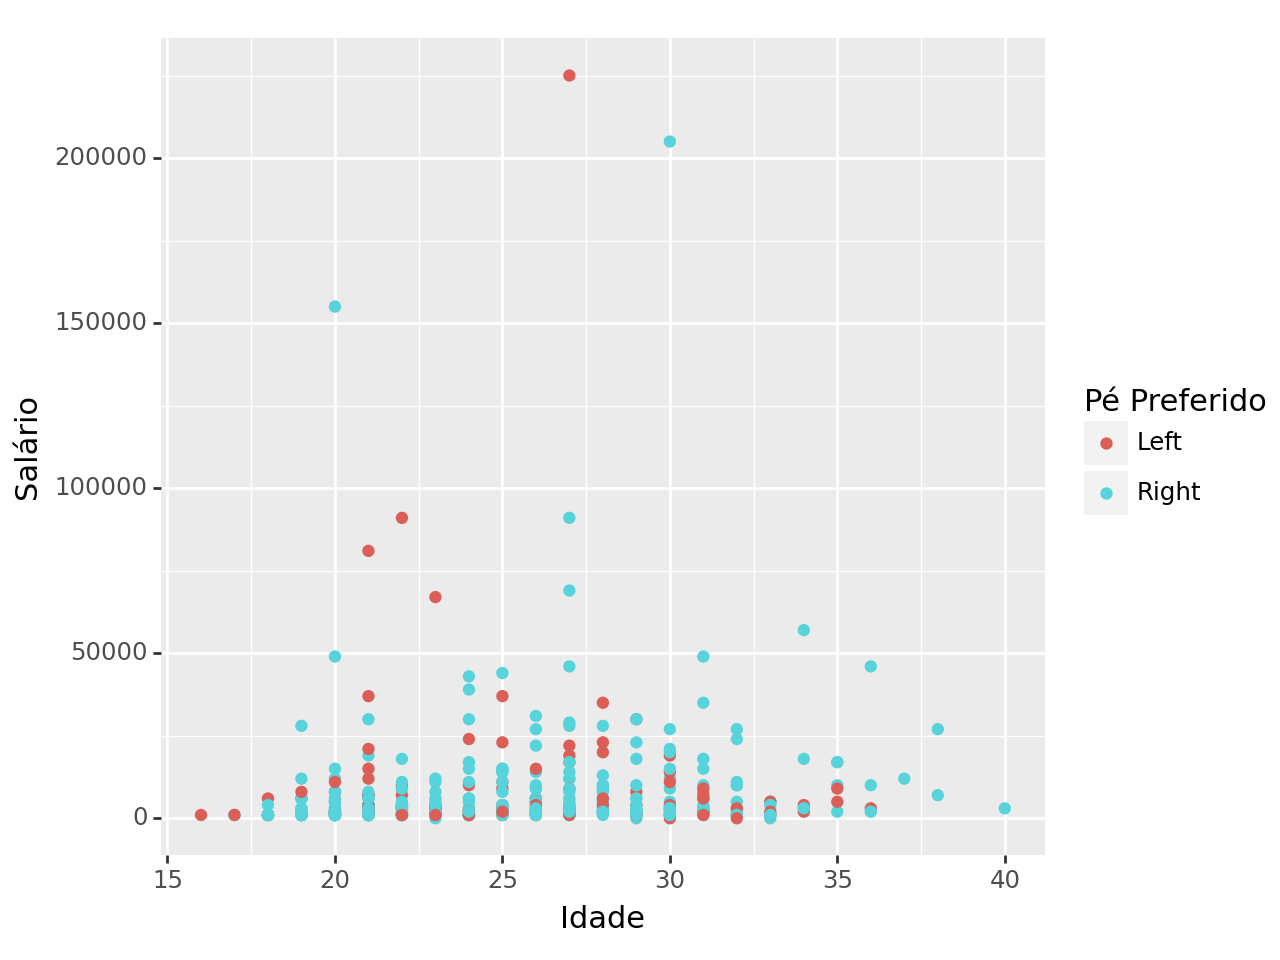

<Figure Size: (640 x 480)>

In [63]:
(ggplot(data = fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color = "preferred_foot"))+ labs(x="Idade", y="Salário", color="Pé Preferido"))

## Dá pra mudar o título da legenda mudando o color para fill para outros tipos de gráficos como o gráfico de barras onde se usa fill

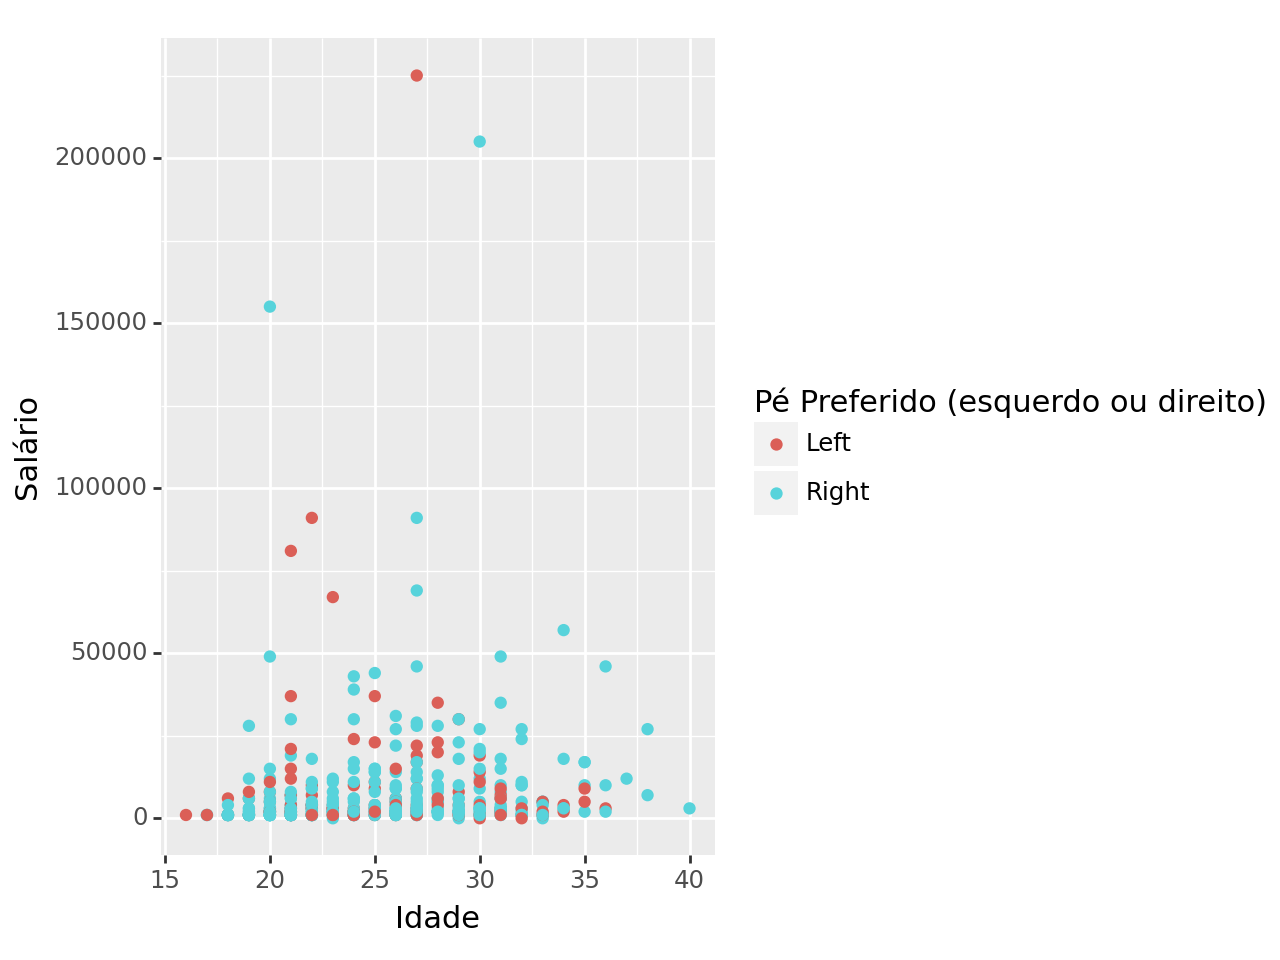

<Figure Size: (640 x 480)>

In [64]:
(ggplot(data = fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color = "preferred_foot"))+ labs(x="Idade", y="Salário", color="Pé Preferido")+
guides(color=guide_legend(title="Pé Preferido (esquerdo ou direito)")))

## Separando gráficos por alguma variável
#### [Facetas](https://ggplot2.tidyverse.org/reference/facet_grid.html)

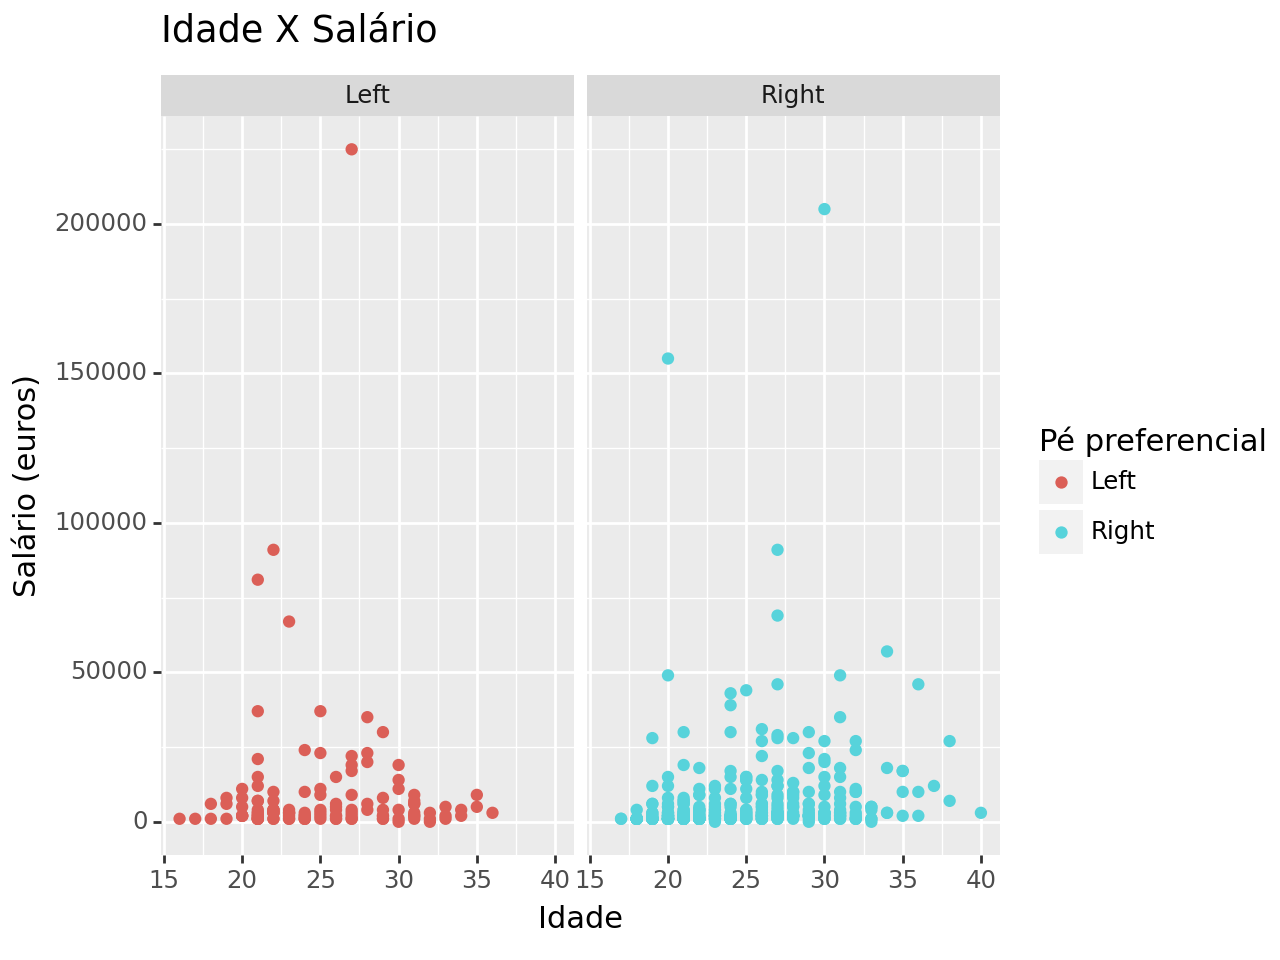

<Figure Size: (640 x 480)>

In [84]:
(ggplot(fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color="preferred_foot")) +
  labs(
    x = "Idade", y = "Salário (euros)",
    title = "Idade X Salário", color = "Pé preferencial"
)+facet_grid(". ~ preferred_foot"))

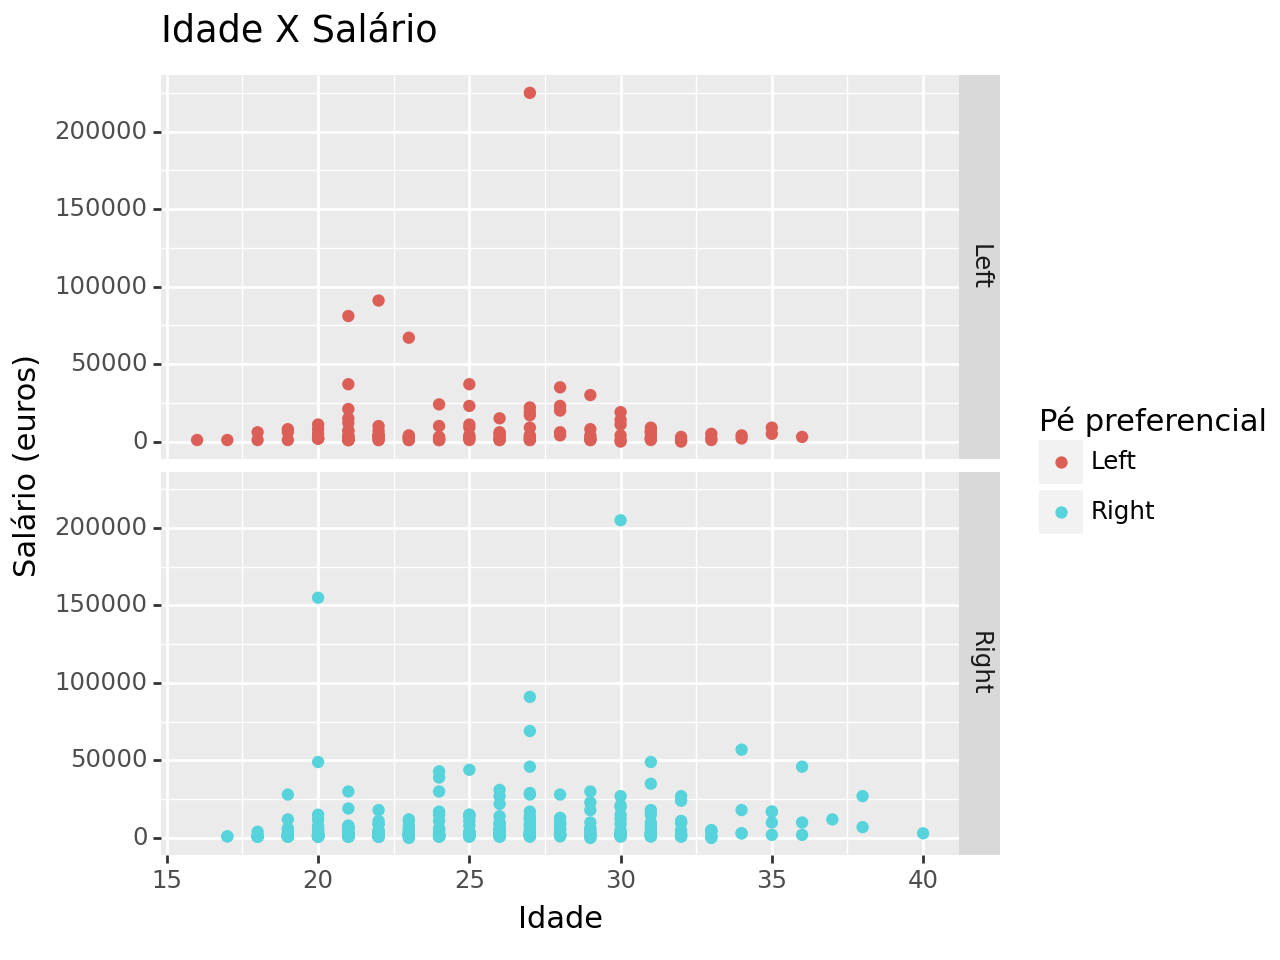

<Figure Size: (640 x 480)>

In [85]:
(ggplot(fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color="preferred_foot")) +
  labs(
    x = "Idade", y = "Salário (euros)",
    title = "Idade X Salário", color = "Pé preferencial"
)+facet_grid("preferred_foot ~ ."))

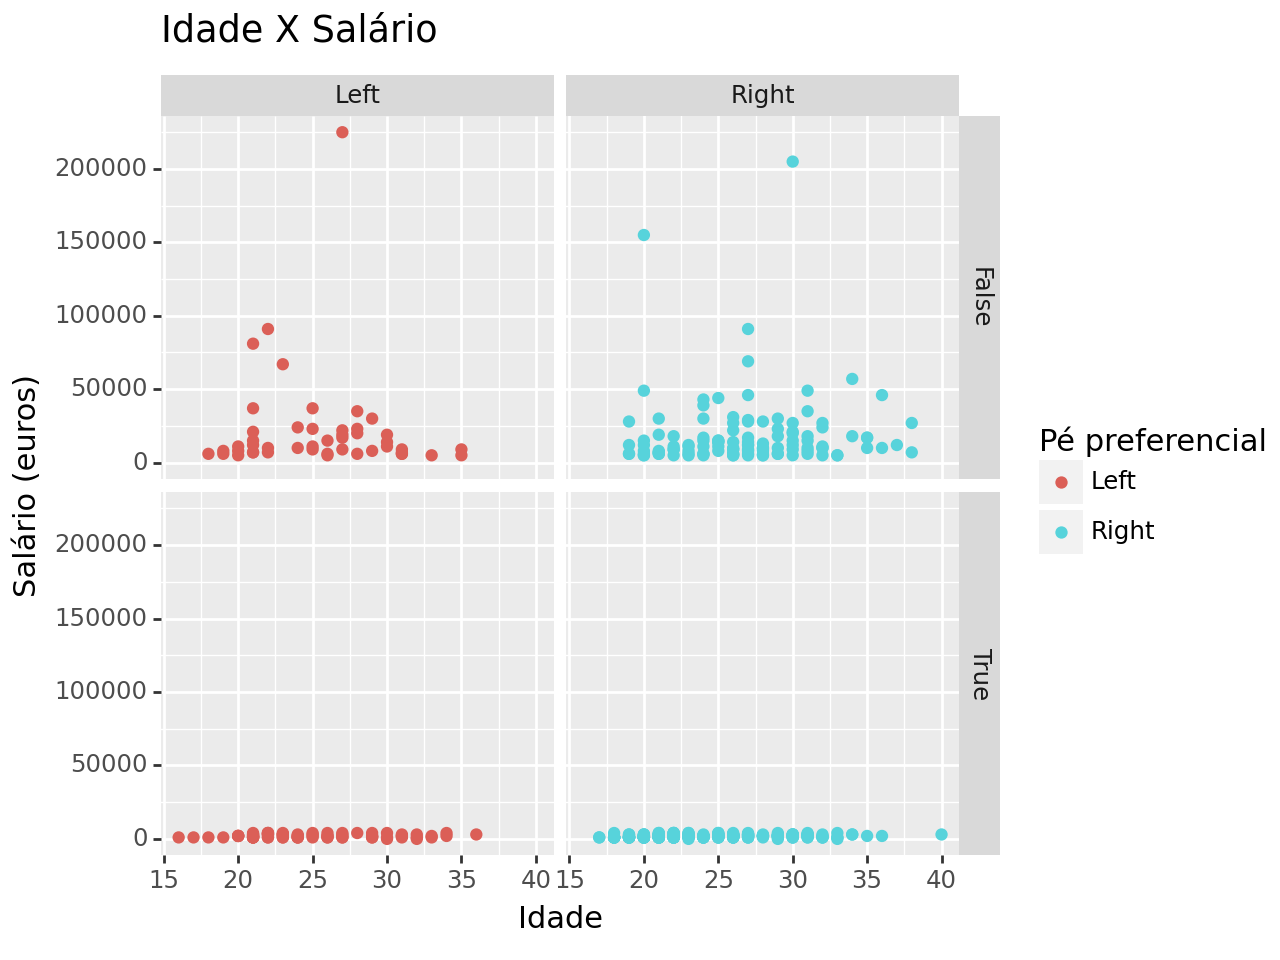

<Figure Size: (640 x 480)>

In [87]:
(ggplot(fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color="preferred_foot")) +
  labs(
    x = "Idade", y = "Salário (euros)",
    title = "Idade X Salário", color = "Pé preferencial"
)+facet_grid("wage_eur_bin ~ preferred_foot"))

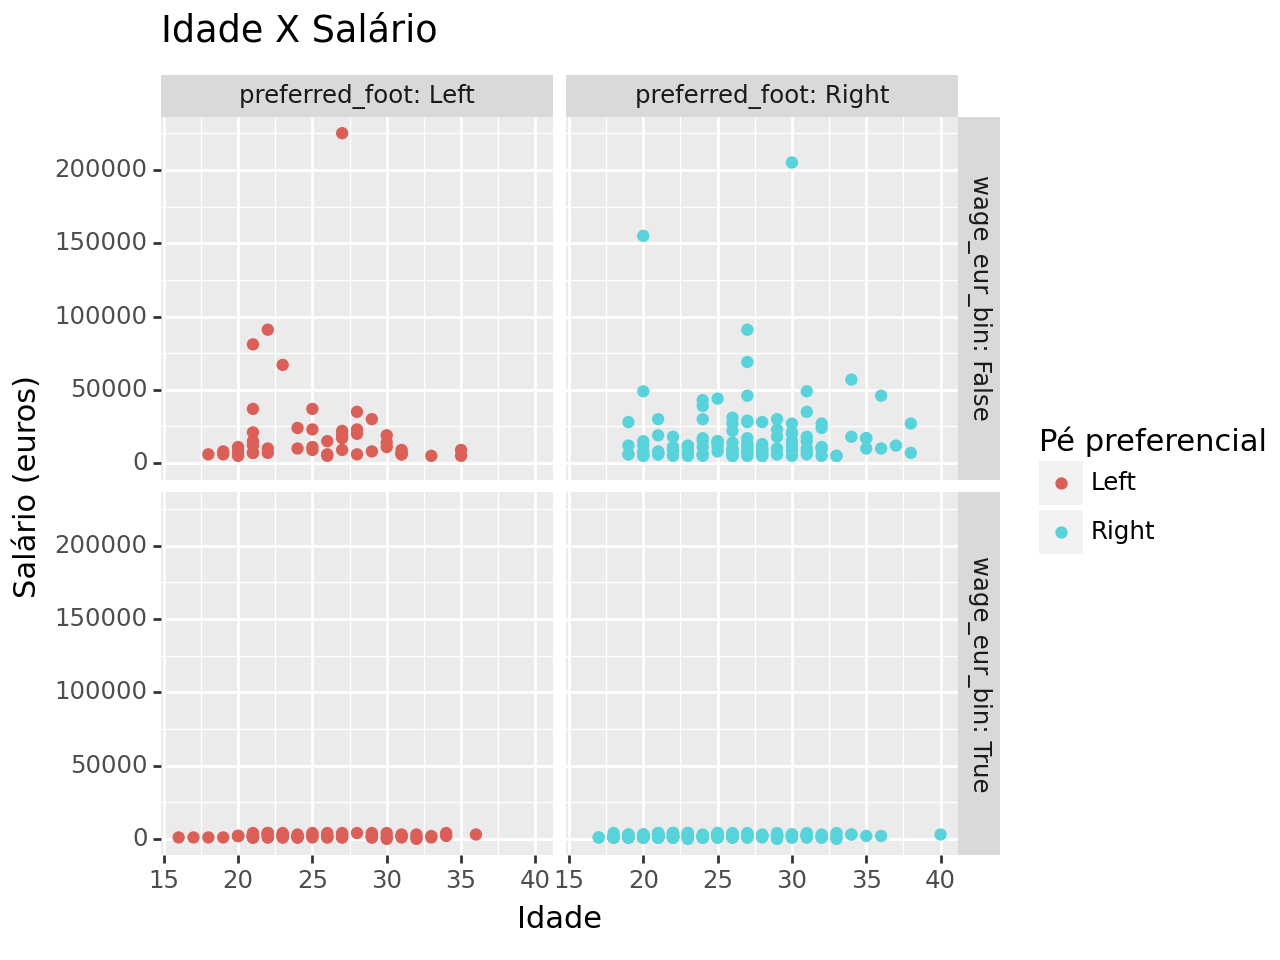

<Figure Size: (640 x 480)>

In [88]:
(ggplot(fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color="preferred_foot")) +
  labs(
    x = "Idade", y = "Salário (euros)",
    title = "Idade X Salário", color = "Pé preferencial"
)+facet_grid("wage_eur_bin ~ preferred_foot", labeller = label_both))

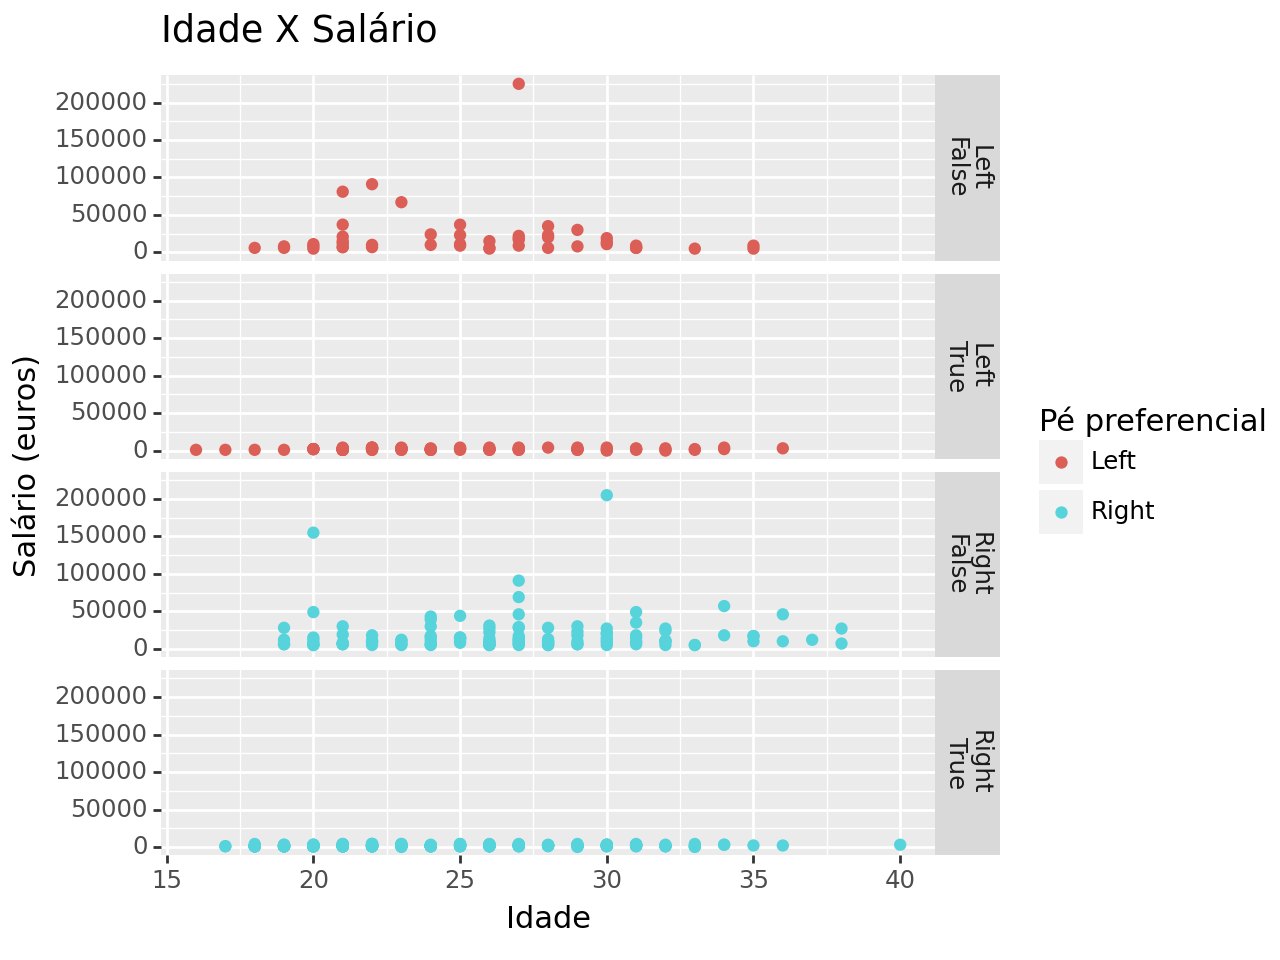

<Figure Size: (640 x 480)>

In [90]:
(ggplot(fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color="preferred_foot")) +
  labs(
    x = "Idade", y = "Salário (euros)",
    title = "Idade X Salário", color = "Pé preferencial"
)+facet_grid("preferred_foot + wage_eur_bin ~ ."))

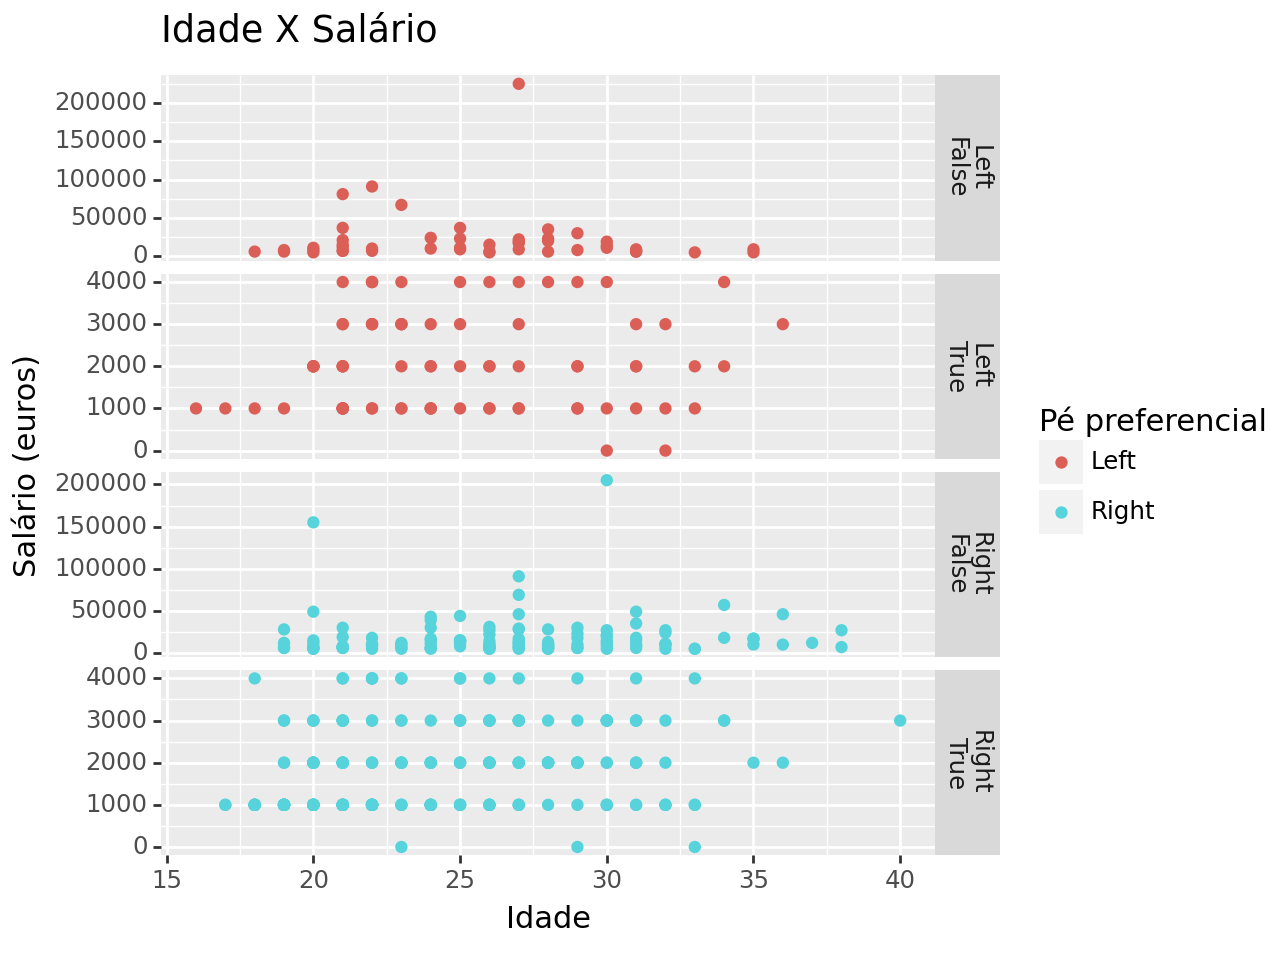

<Figure Size: (640 x 480)>

In [92]:
(ggplot(fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color="preferred_foot")) +
  labs(
    x = "Idade", y = "Salário (euros)",
    title = "Idade X Salário", color = "Pé preferencial"
)+facet_grid("preferred_foot + wage_eur_bin ~ .", scales="free_y"))

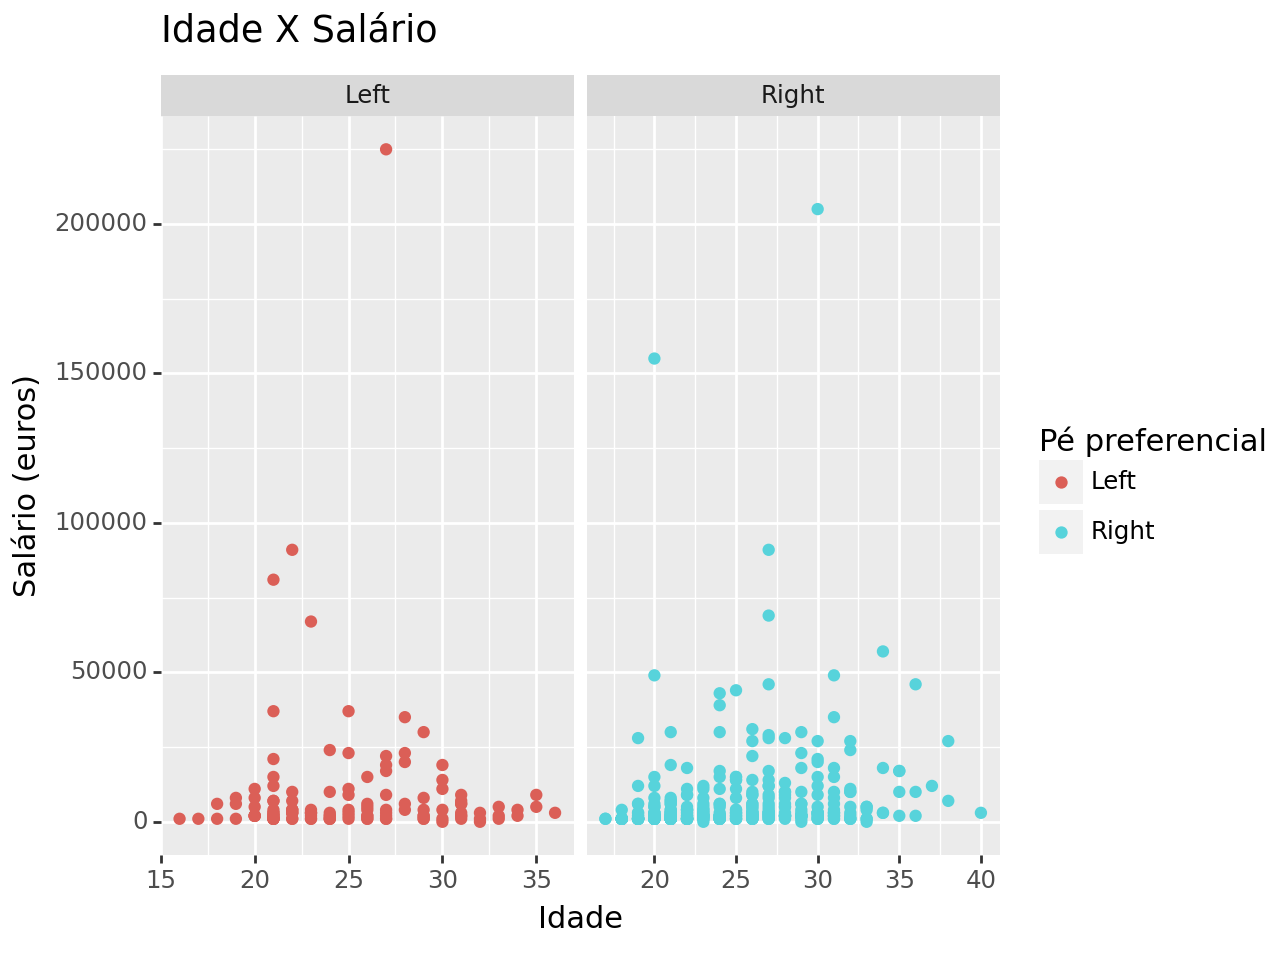

<Figure Size: (640 x 480)>

In [93]:
(ggplot(fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color="preferred_foot")) +
  labs(
    x = "Idade", y = "Salário (euros)",
    title = "Idade X Salário", color = "Pé preferencial"
)+facet_grid(". ~ preferred_foot", scales="free_x"))

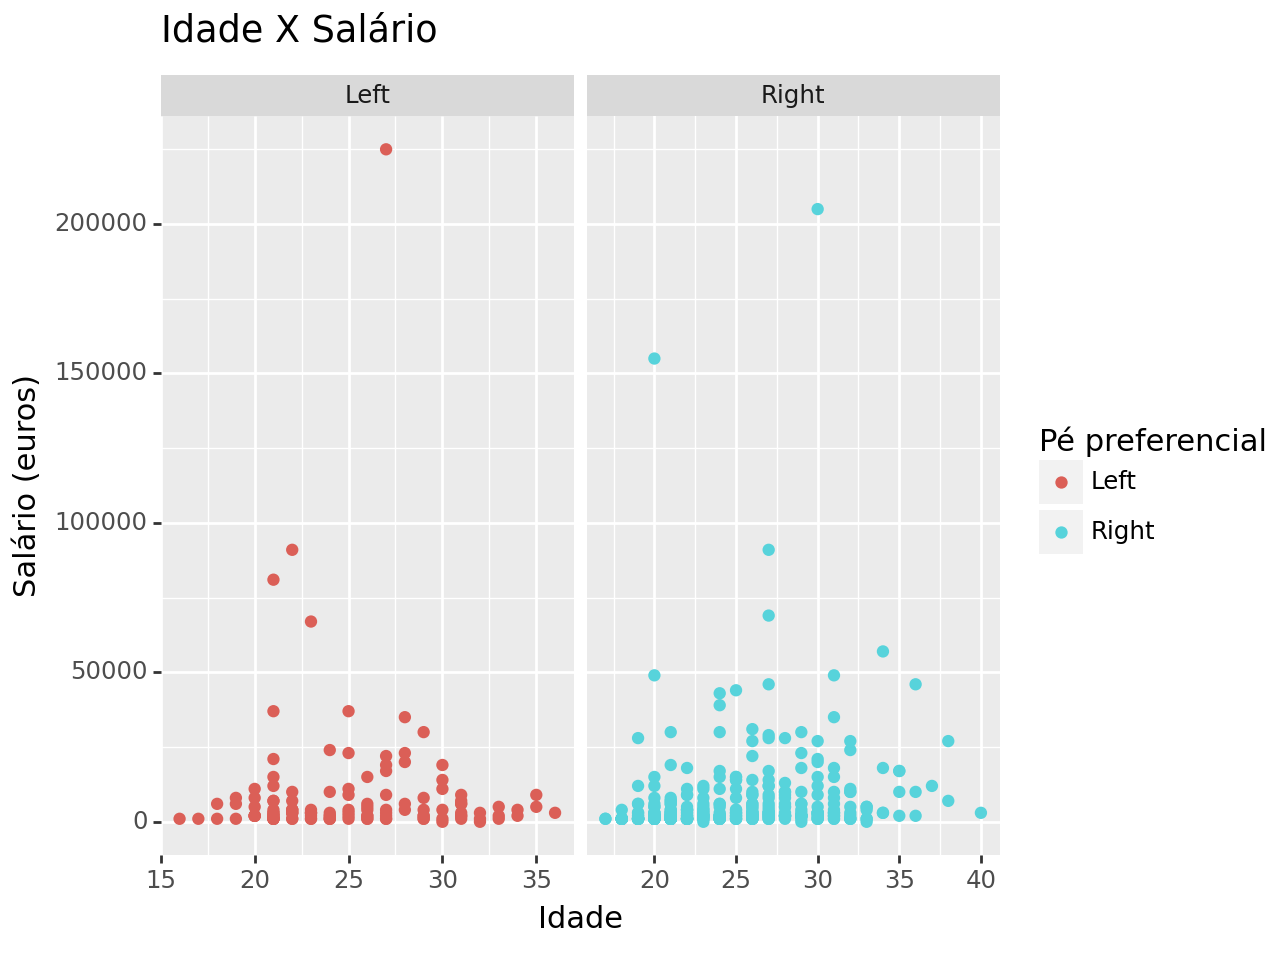

<Figure Size: (640 x 480)>

In [94]:
(ggplot(fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color="preferred_foot")) +
  labs(
    x = "Idade", y = "Salário (euros)",
    title = "Idade X Salário", color = "Pé preferencial"
)+facet_grid(". ~ preferred_foot", scales="free"))

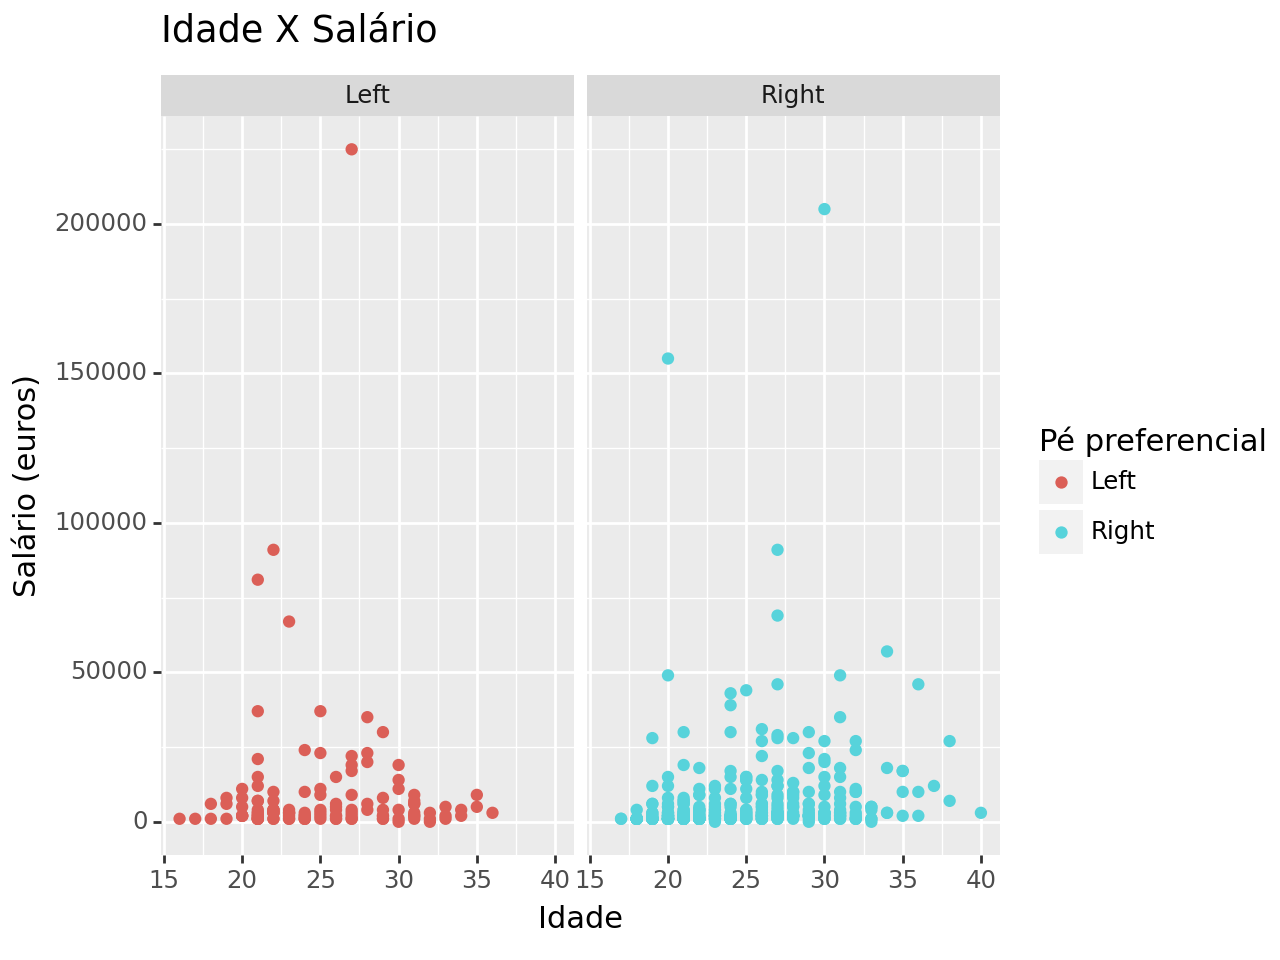

<Figure Size: (640 x 480)>

In [97]:
(ggplot(fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color="preferred_foot")) +
  labs(
    x = "Idade", y = "Salário (euros)",
    title = "Idade X Salário", color = "Pé preferencial"
)+facet_wrap(facets="~ preferred_foot"))

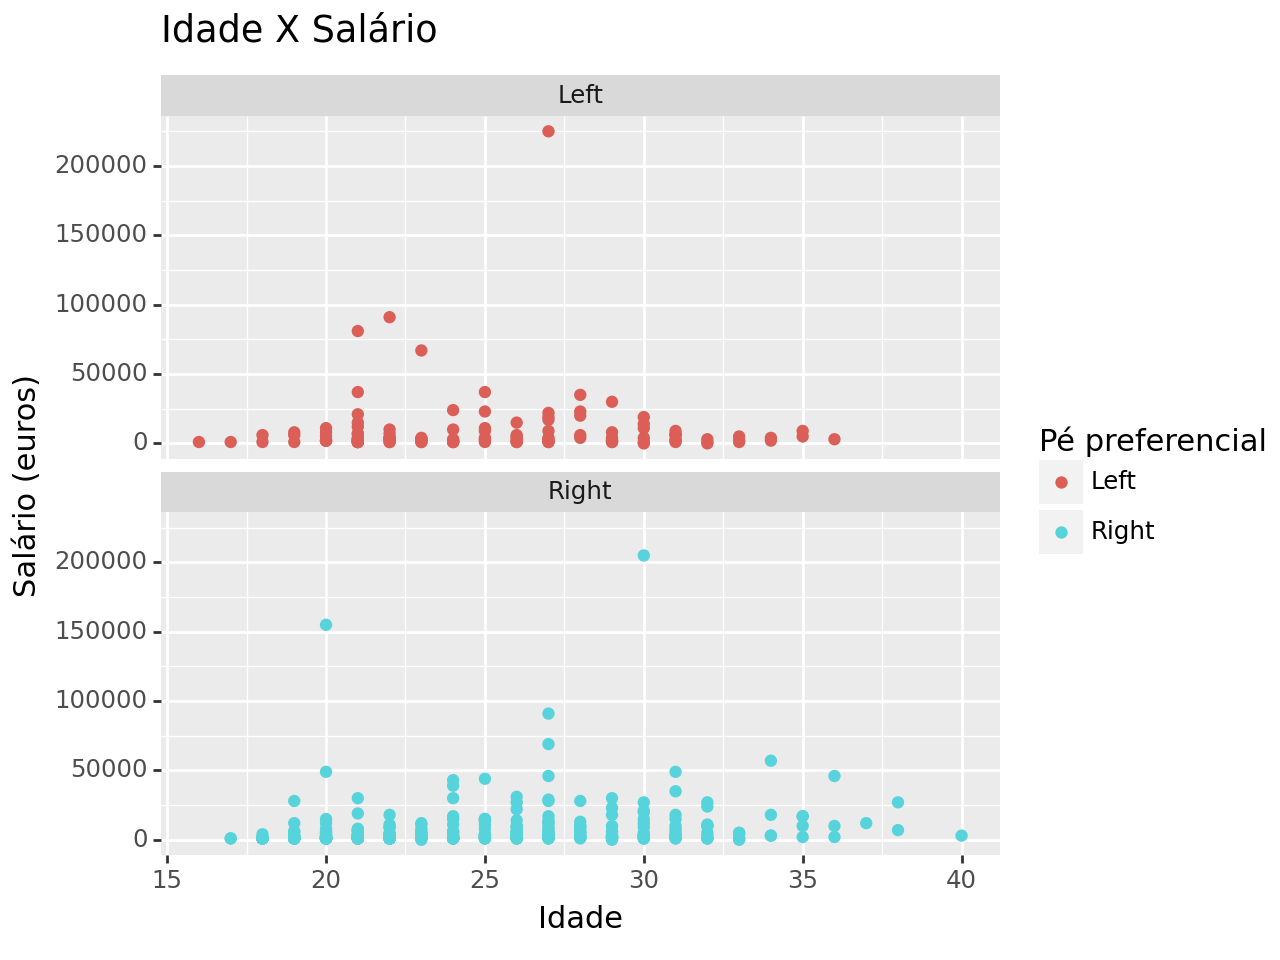

<Figure Size: (640 x 480)>

In [99]:
(ggplot(fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color="preferred_foot")) +
  labs(
    x = "Idade", y = "Salário (euros)",
    title = "Idade X Salário", color = "Pé preferencial"
)+facet_wrap(facets="~ preferred_foot", ncol=1))

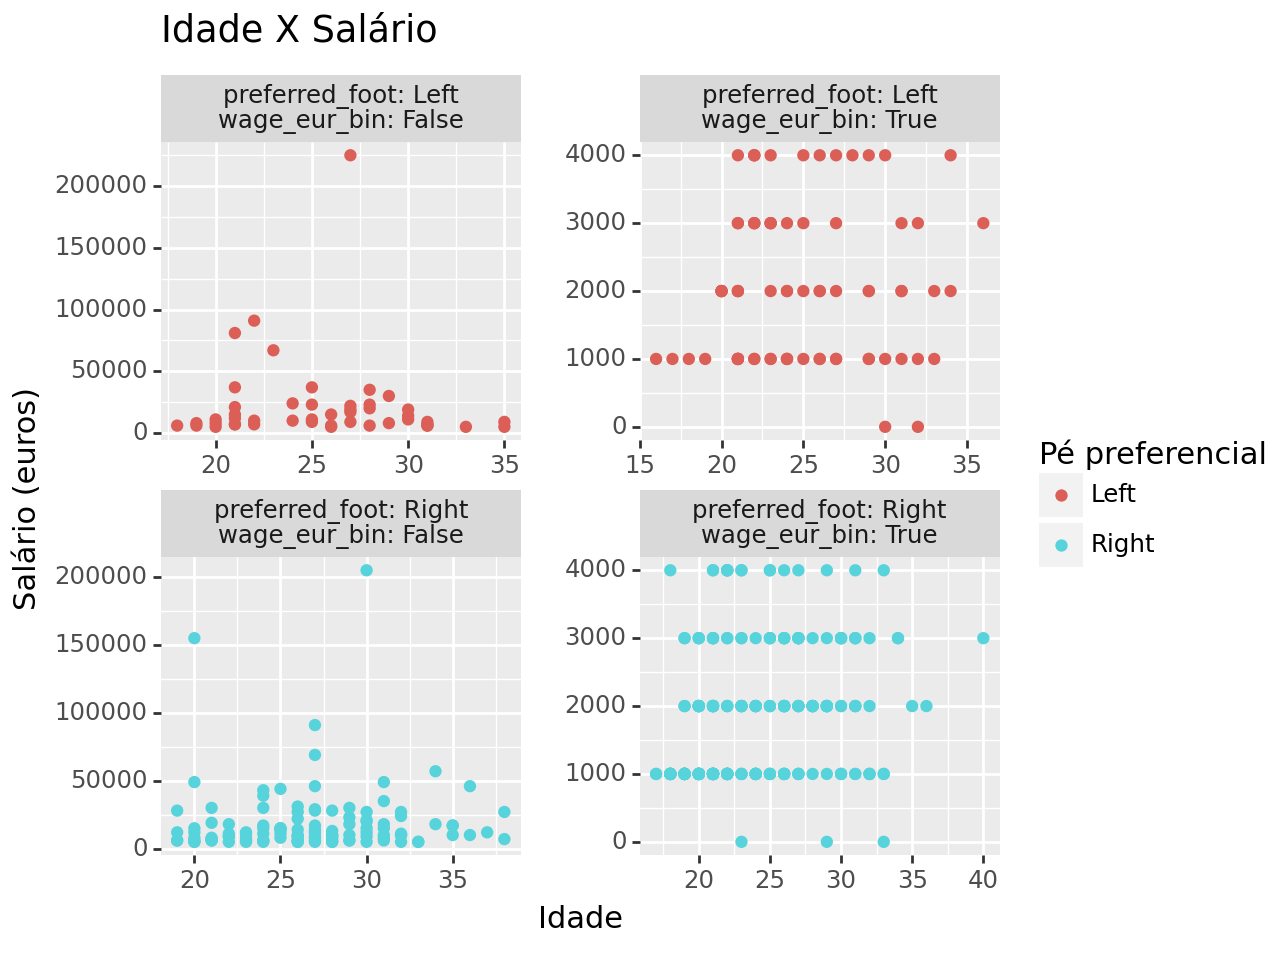

<Figure Size: (640 x 480)>

In [103]:
(ggplot(fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color="preferred_foot")) +
  labs(
    x = "Idade", y = "Salário (euros)",
    title = "Idade X Salário", color = "Pé preferencial"
)+facet_wrap("~ preferred_foot + wage_eur_bin ", labeller = label_both, scales="free"))

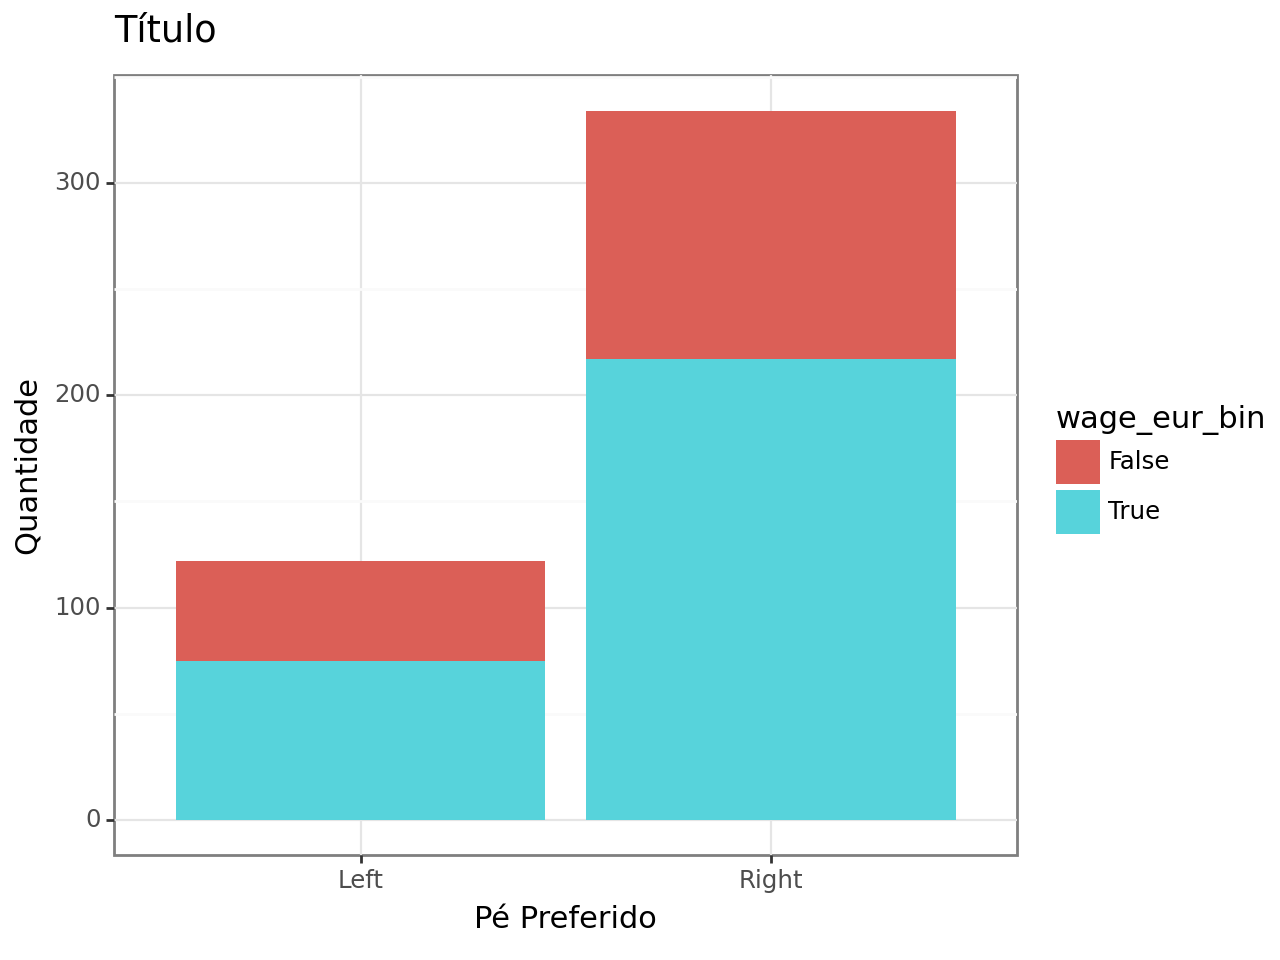

<Figure Size: (640 x 480)>

In [66]:
(ggplot(fifa)+aes("preferred_foot", fill="wage_eur_bin")+geom_bar(position="stack")+theme_bw()+
labs(y = "Quantidade", x = "Pé Preferido", title="Título"))

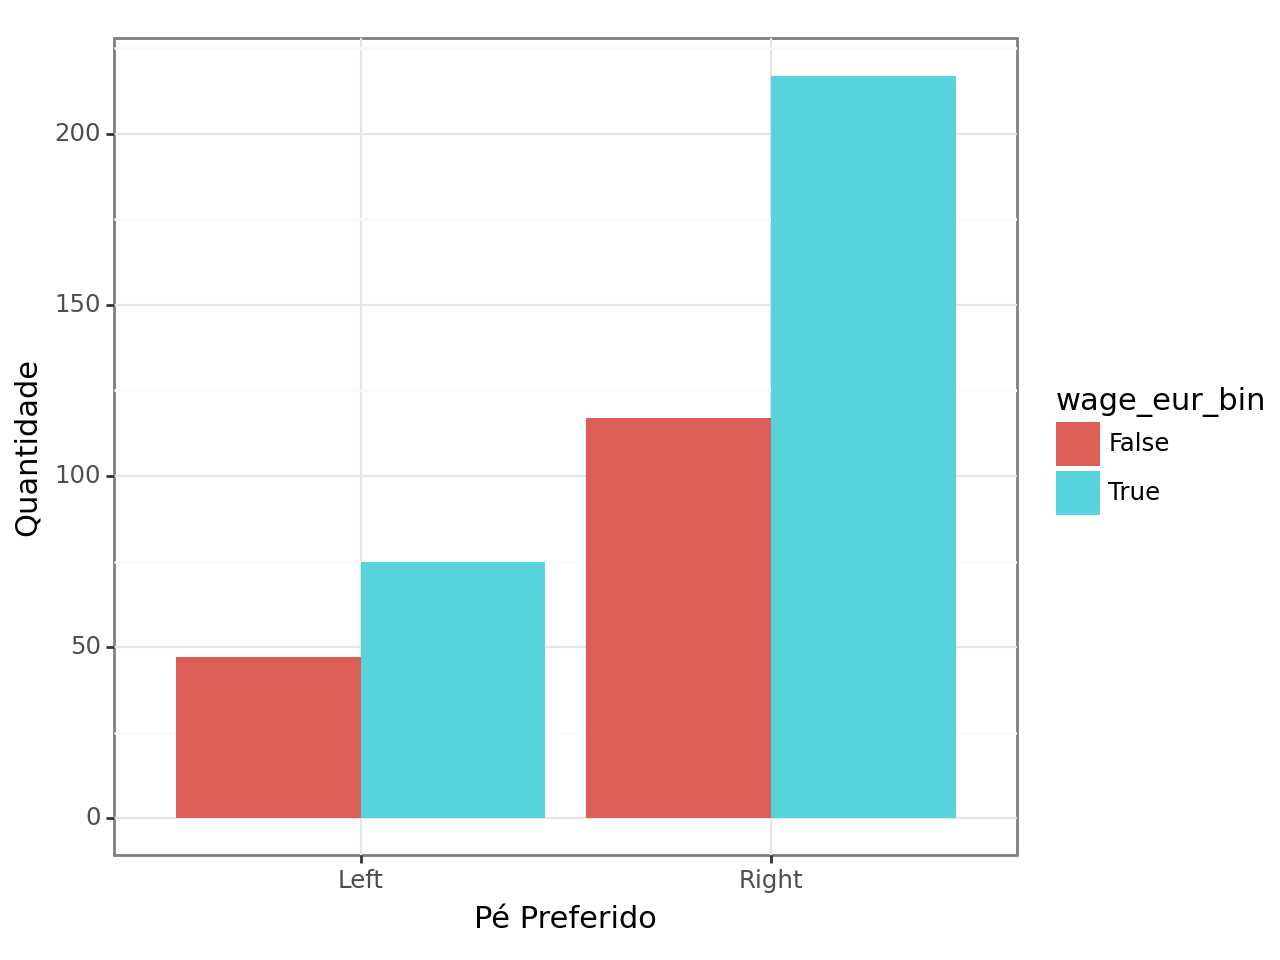

<Figure Size: (640 x 480)>

In [67]:
(ggplot(fifa)+aes("preferred_foot", fill="wage_eur_bin")+geom_bar(position="dodge")+theme_bw()+
labs(y = "Quantidade", x = "Pé Preferido"))

C:\Users\alber\anaconda3\lib\site-packages\plotnine\scales\scale.py:143: PlotnineWarning: scale_fill_manual could not recognise parameter `type`


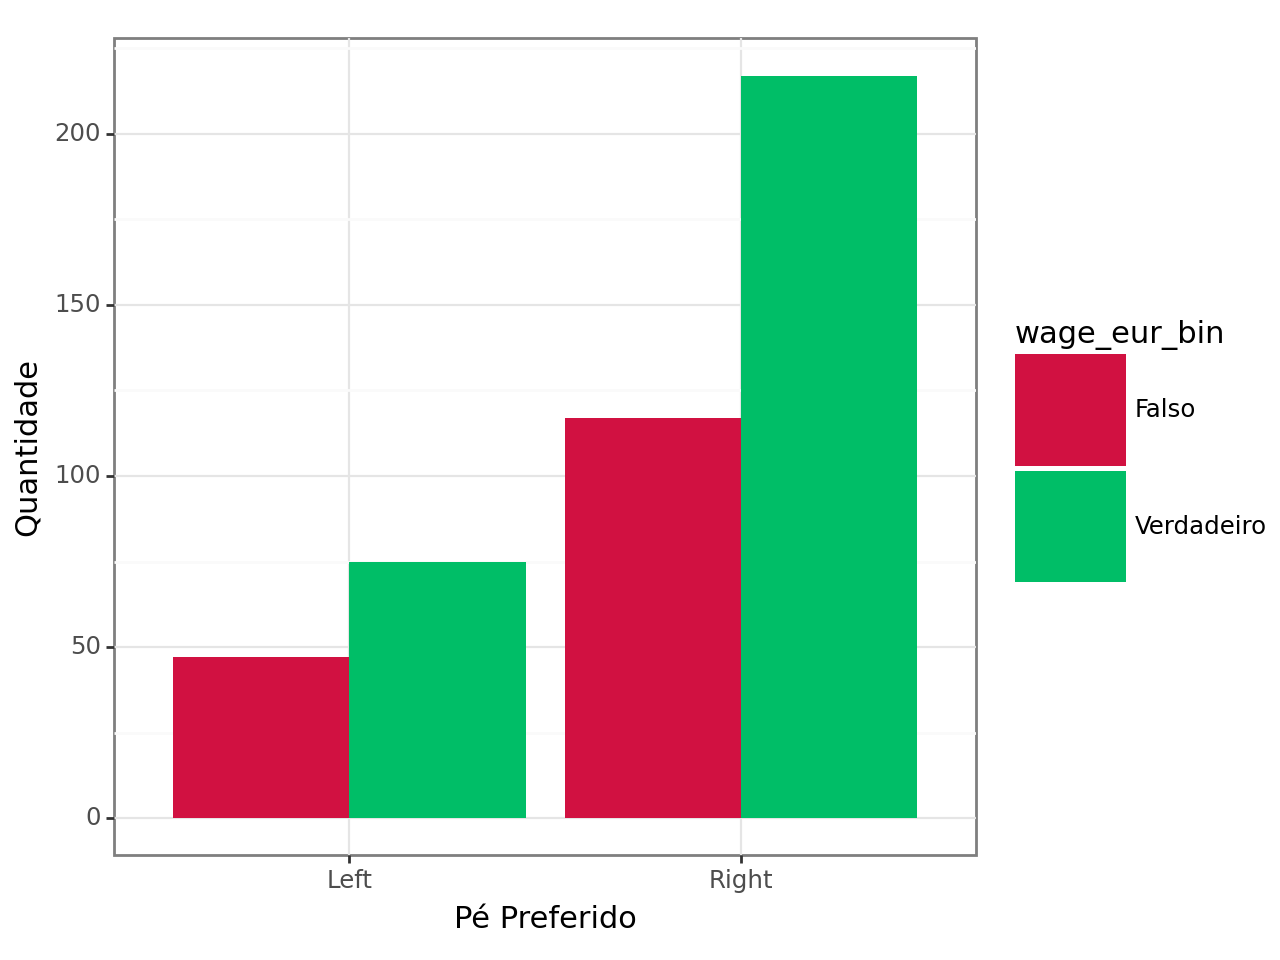

<Figure Size: (640 x 480)>

In [68]:
(ggplot(fifa)+aes("preferred_foot", fill="wage_eur_bin")+geom_bar(position="dodge")+theme_bw()+
labs(y = "Quantidade", x = "Pé Preferido")
+scale_fill_manual(type="qual", values=["#d11141", "#00BE67"], labels=["Falso", "Verdadeiro"])
+theme(legend_key_size=40))

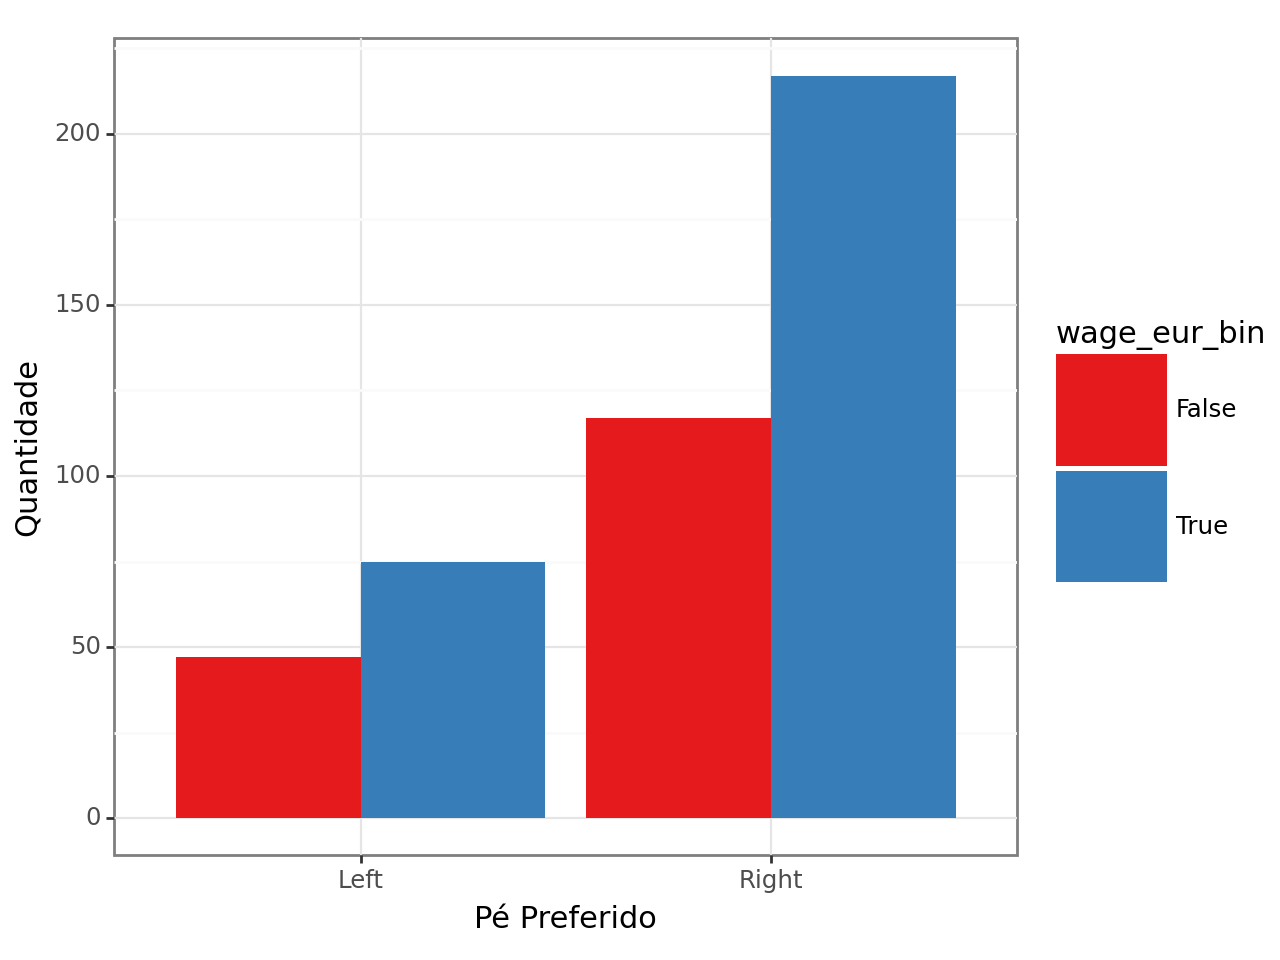

<Figure Size: (640 x 480)>

In [69]:
(ggplot(fifa)+aes("preferred_foot", fill="wage_eur_bin")+geom_bar(position="dodge")+theme_bw()+
labs(y = "Quantidade", x = "Pé Preferido")
+scale_fill_brewer(type="qual", palette="Set1")
+theme(legend_key_size=40))

In [70]:
dados = pd.DataFrame({
"ANO-MES": ["202201", "202202", "202203", "202204", "202205", "202206", "202207", "202208", "202209", "202210", 
            "202211", "202212"]*2,
"y": np.random.randint(4, high=35, size=24),
"cat": ["A"]*12+["B"]*12})

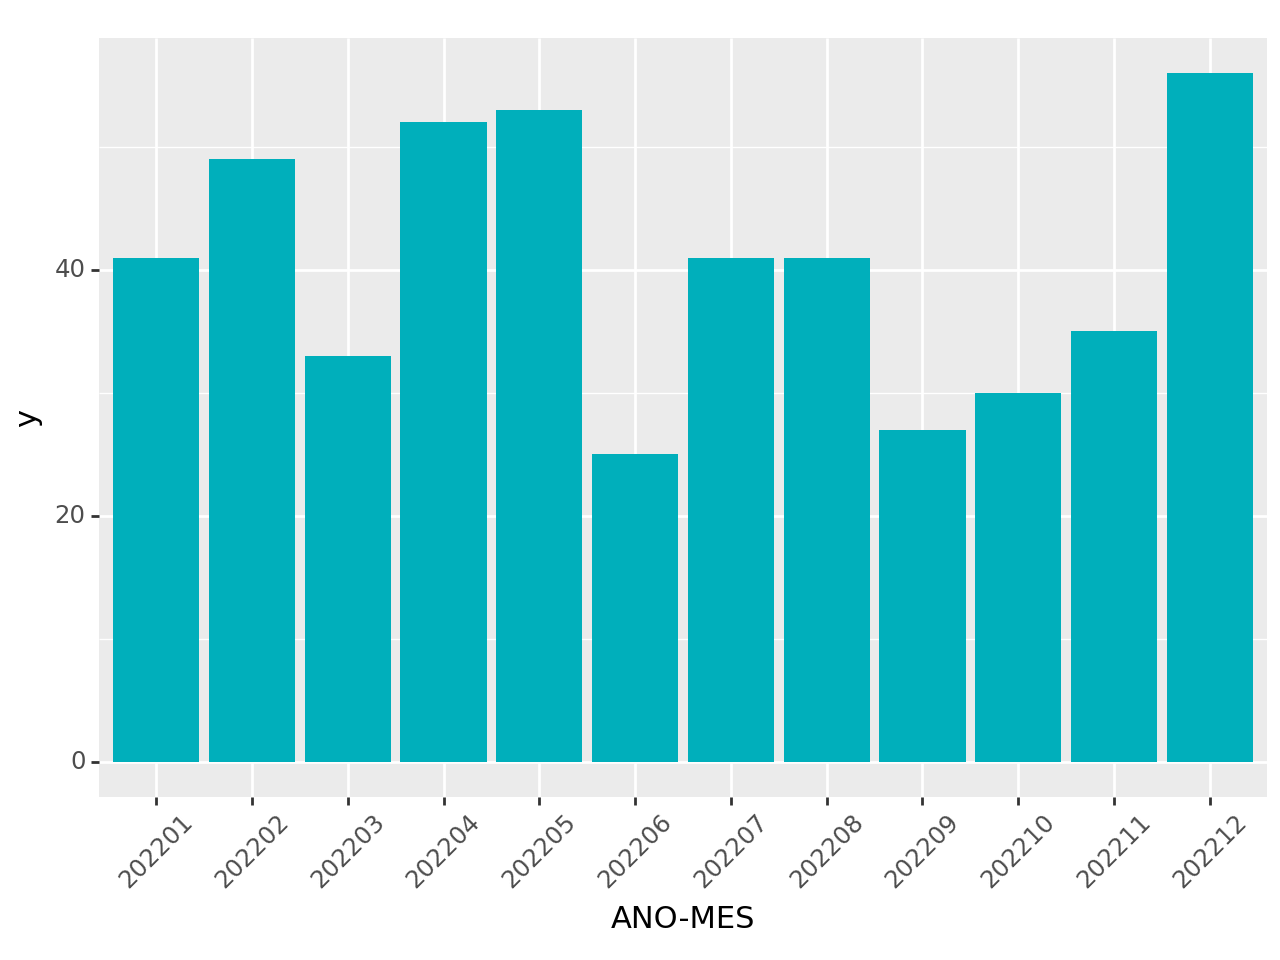

<Figure Size: (640 x 480)>

In [71]:
(ggplot(dados)+aes(x="ANO-MES", y="y")+geom_col(fill="#00AFBB")
+ theme(axis_text_x = element_text(angle = 45)))

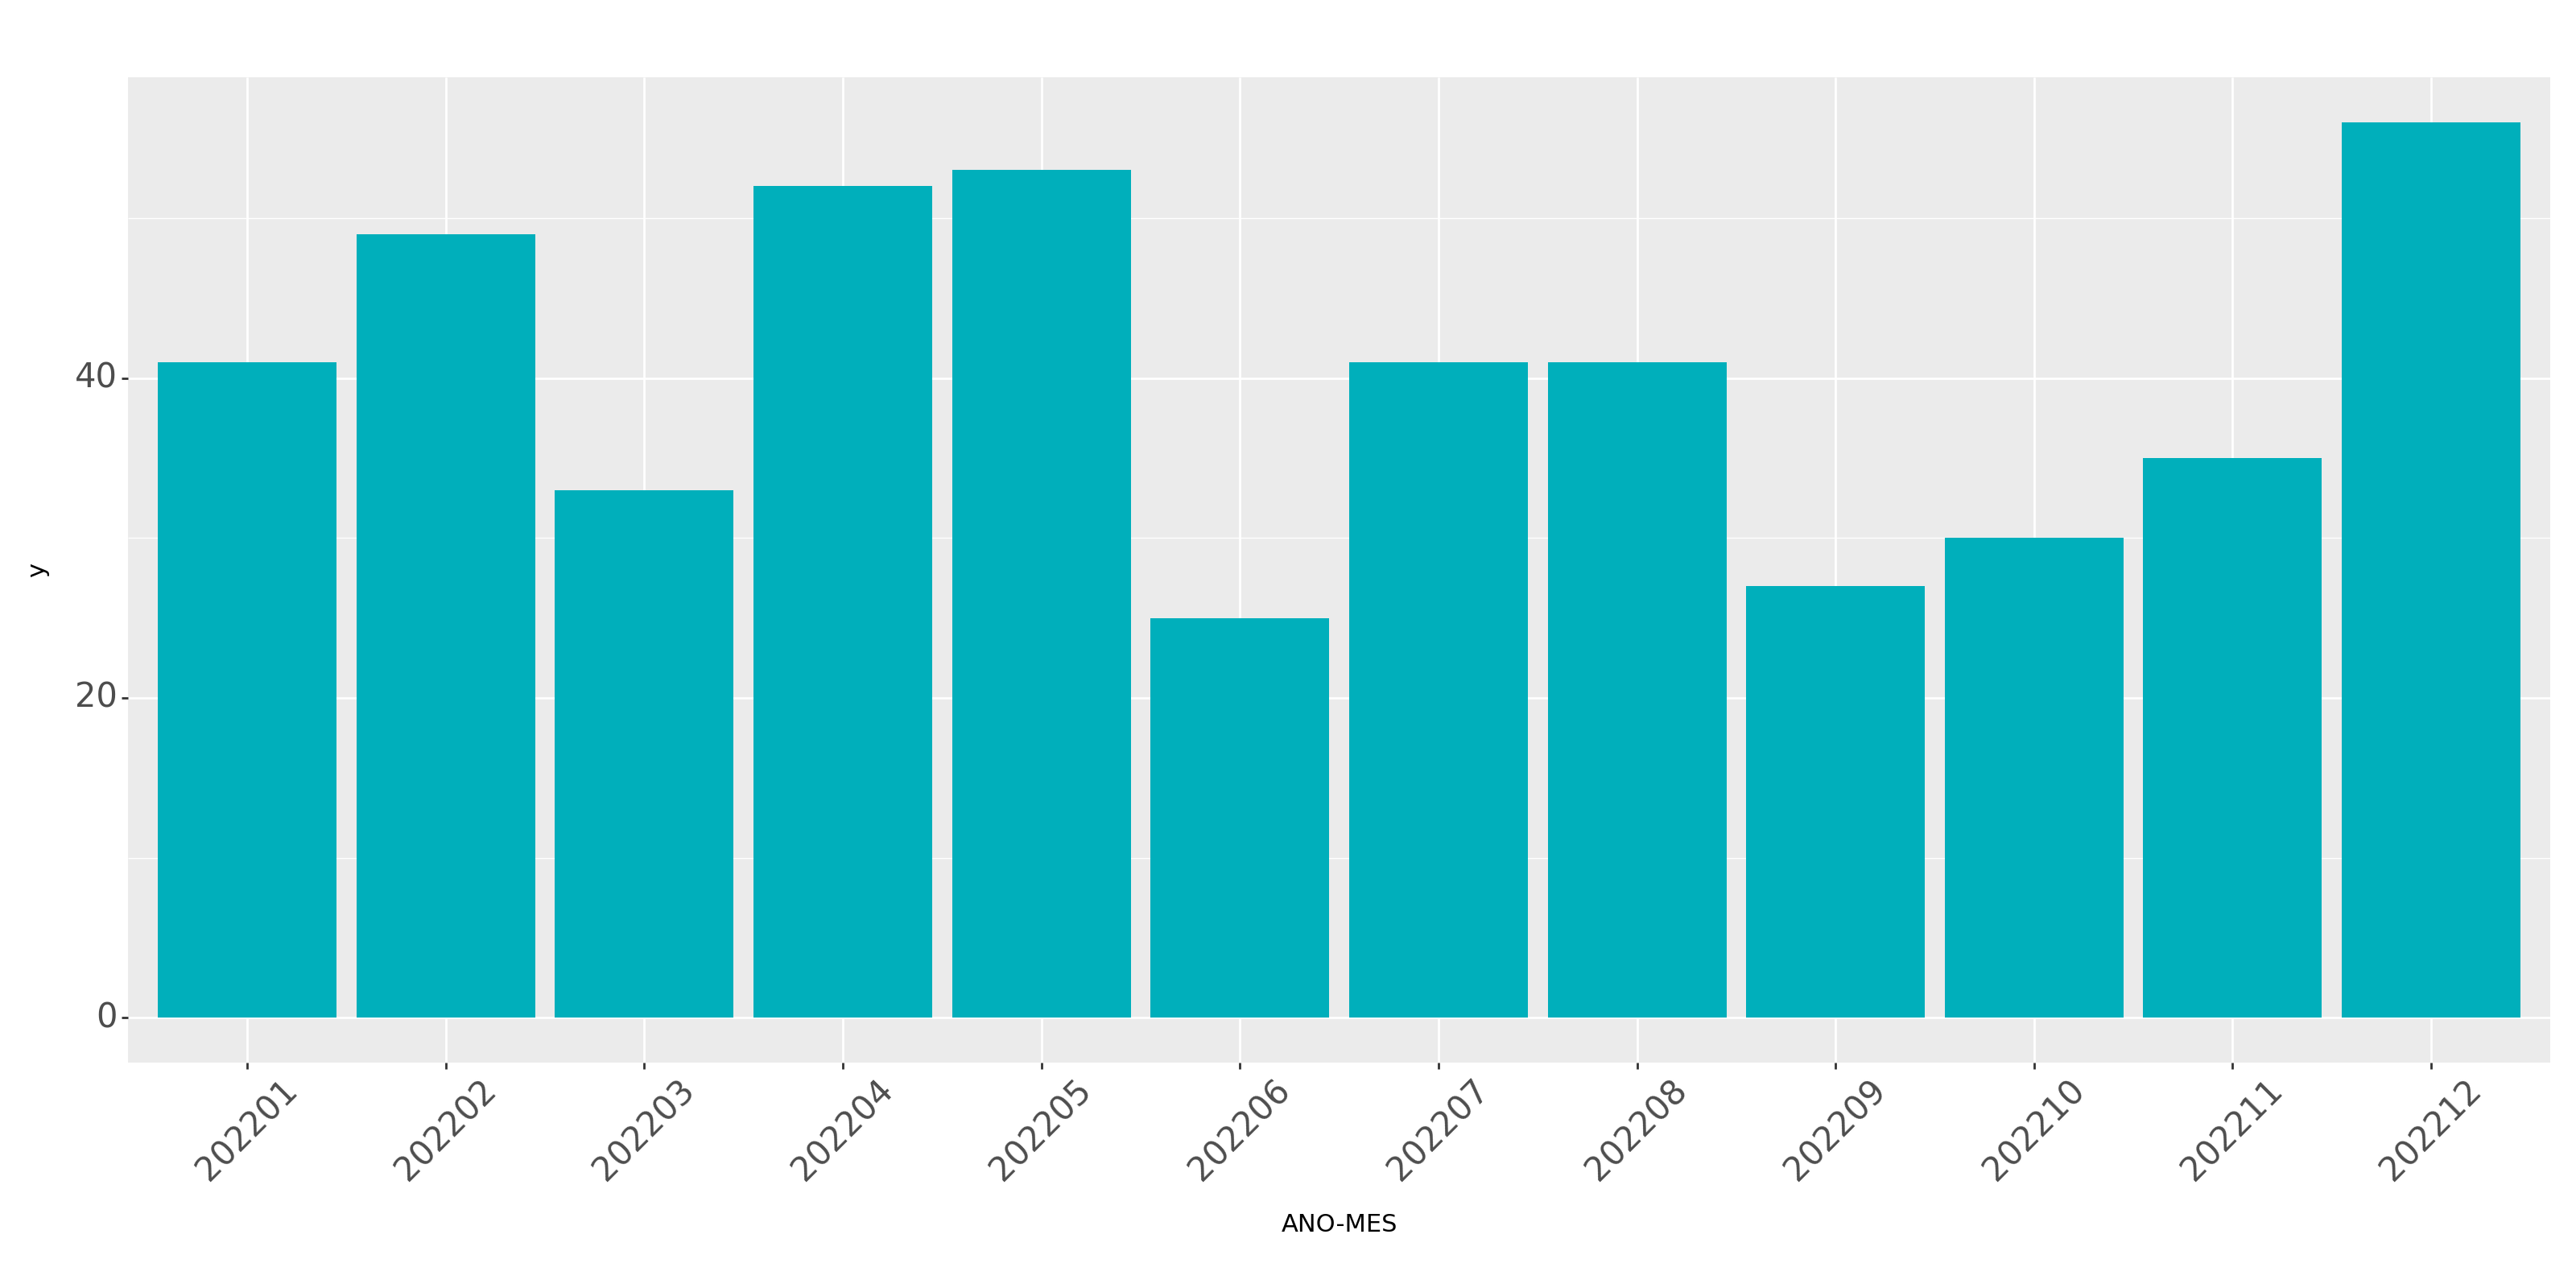

<Figure Size: (1600 x 800)>

In [72]:
(ggplot(dados)+aes(x="ANO-MES", y="y")+geom_col(fill="#00AFBB")
+ theme(axis_text_x = element_text(angle = 45, size=15),
        axis_text_y = element_text(size=15),
        figure_size=(16, 8)))

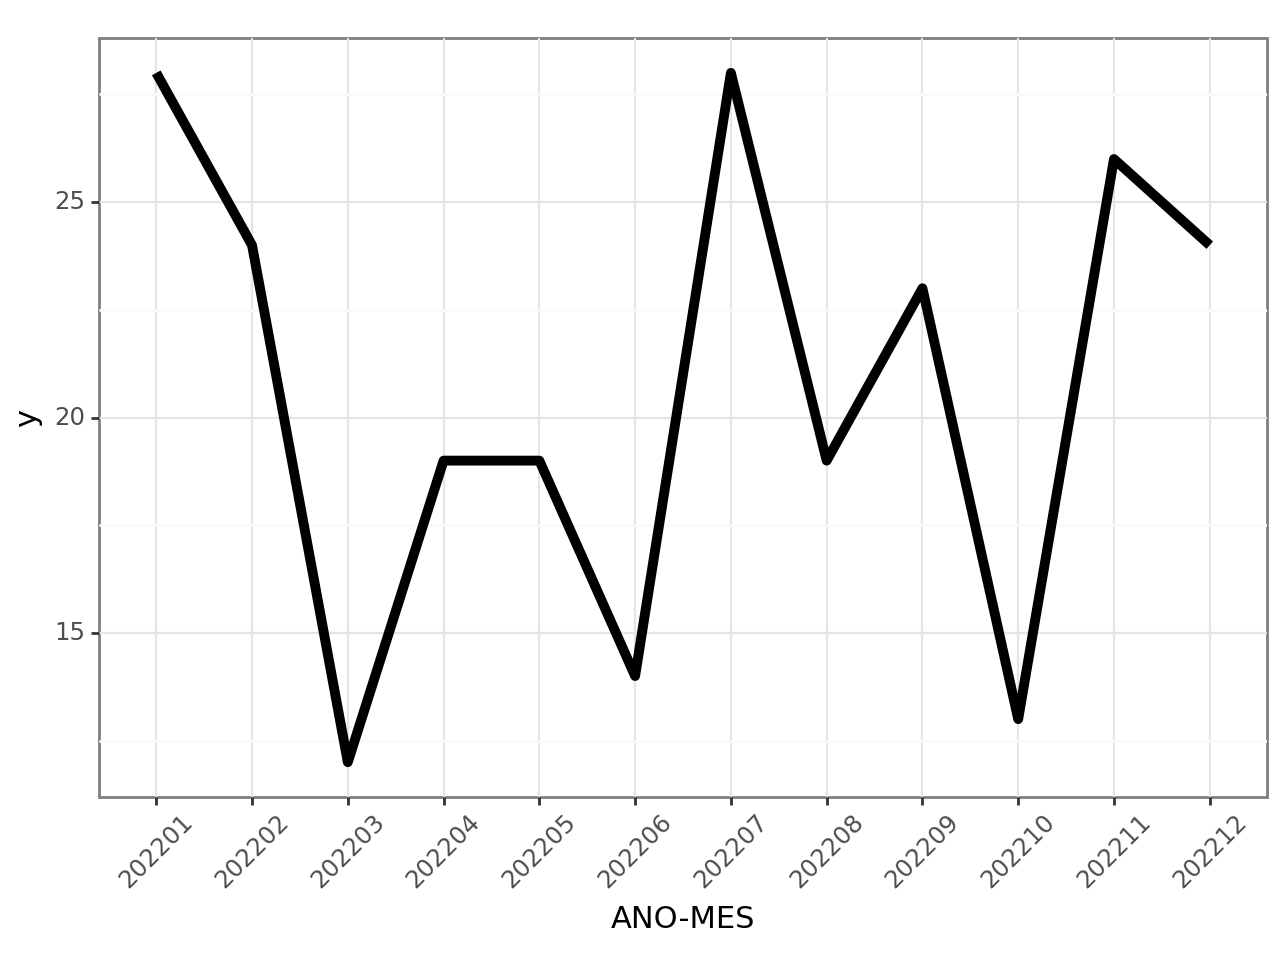

<Figure Size: (640 x 480)>

In [73]:
(ggplot(dados[dados["cat"]=="A"])+aes(x="ANO-MES", y="y", group = 2)+geom_line(size=2)
+theme_bw() + theme(axis_text_x = element_text(angle = 45)))

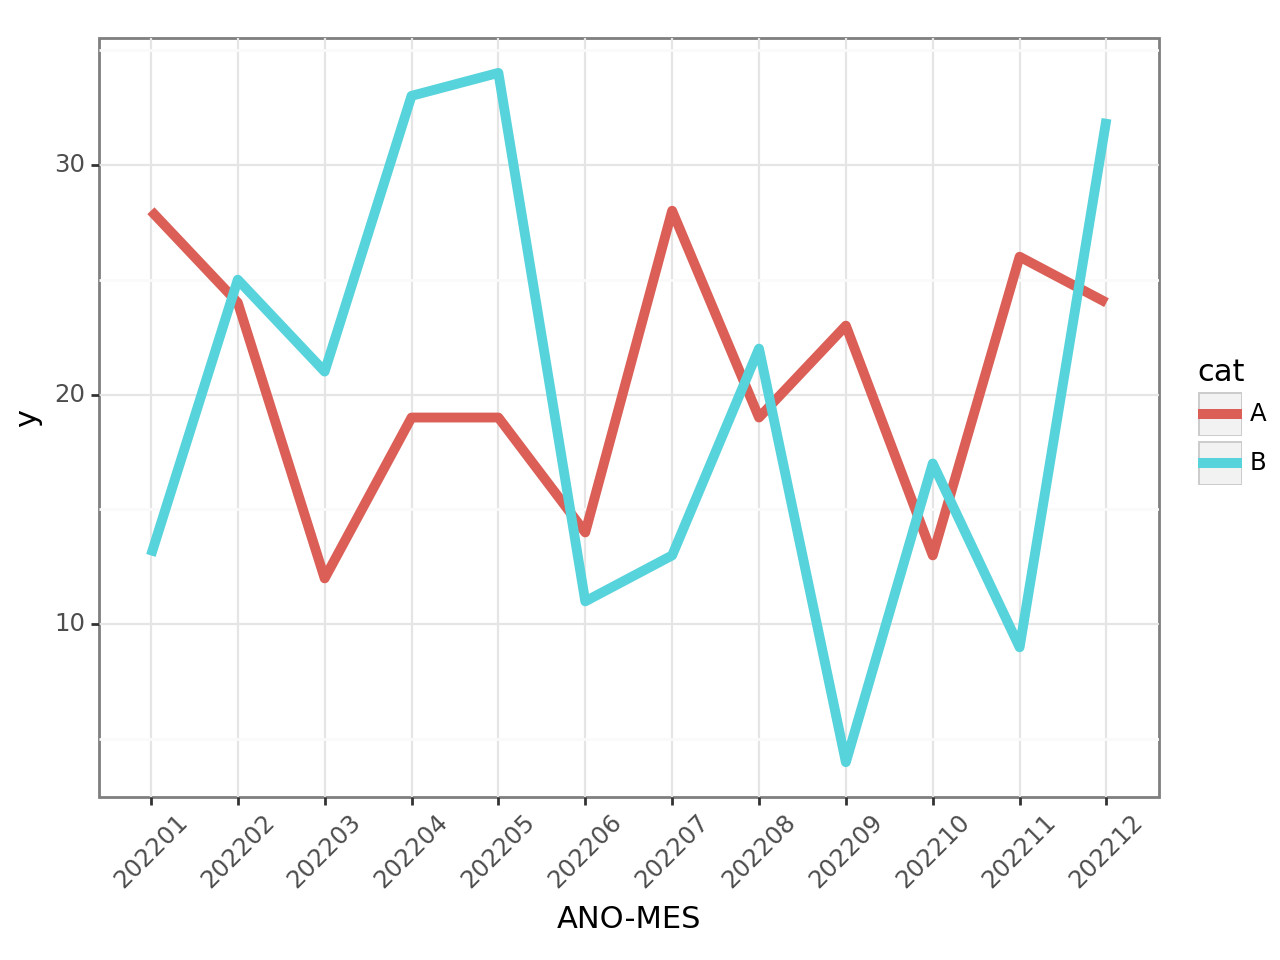

<Figure Size: (640 x 480)>

In [74]:
(ggplot(dados)+aes(x="ANO-MES", y="y", group = "cat", color="cat")+geom_line(size=2)
+theme_bw() + theme(axis_text_x = element_text(angle = 45)))

In [75]:
daily_show = pd.read_csv("../seaborn/dados/daily_show_guests_cleaned.csv")

In [77]:
pd_crosstab = daily_show.groupby(["YEAR", "Group"]).size().reset_index()
pd_crosstab.rename(columns={0: "quant"}, inplace=True)

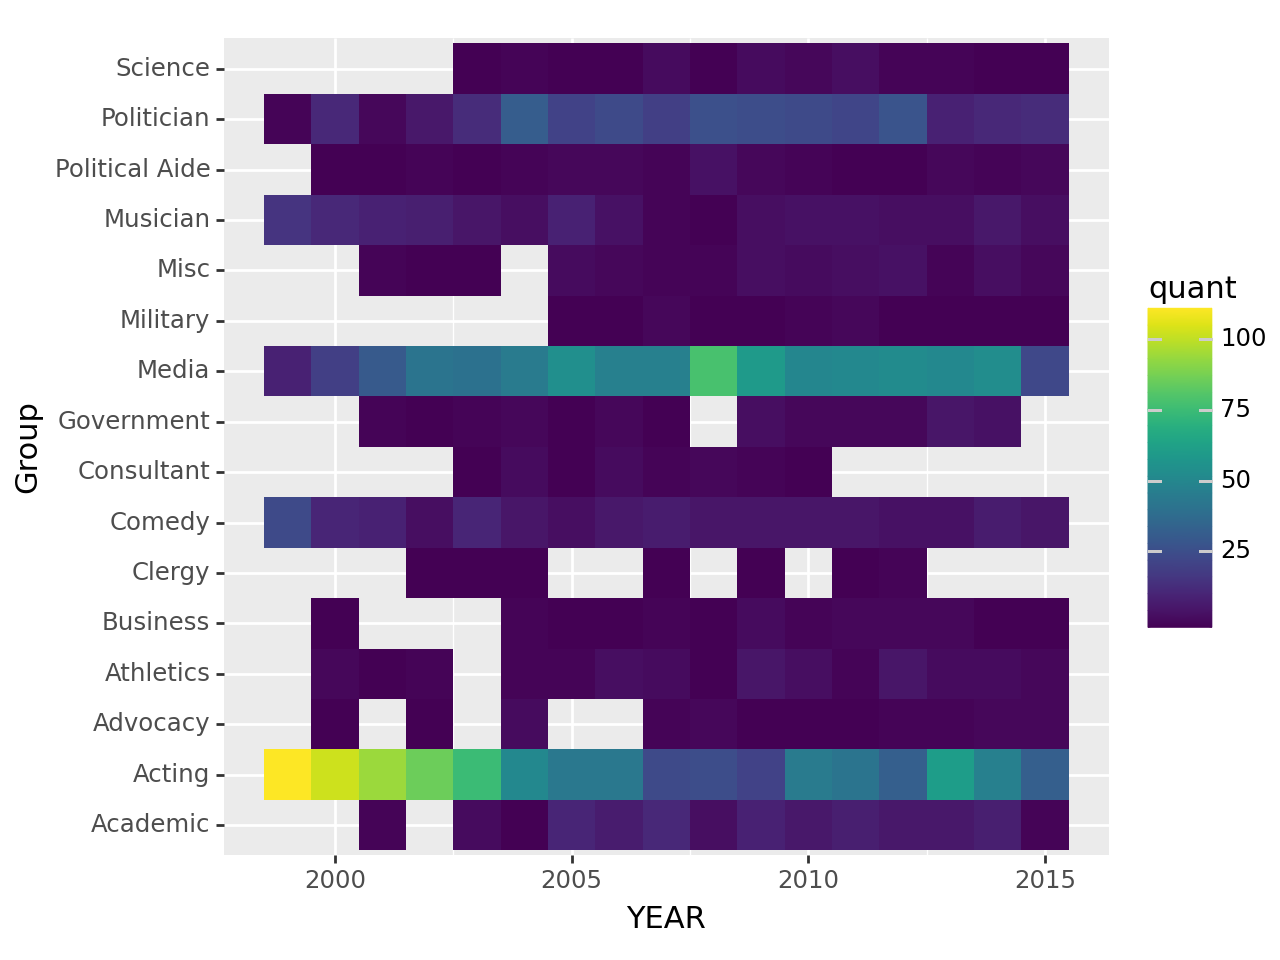

<Figure Size: (640 x 480)>

In [78]:
(ggplot(pd_crosstab, aes(y="Group", x="YEAR", fill="quant"))
 + geom_tile())

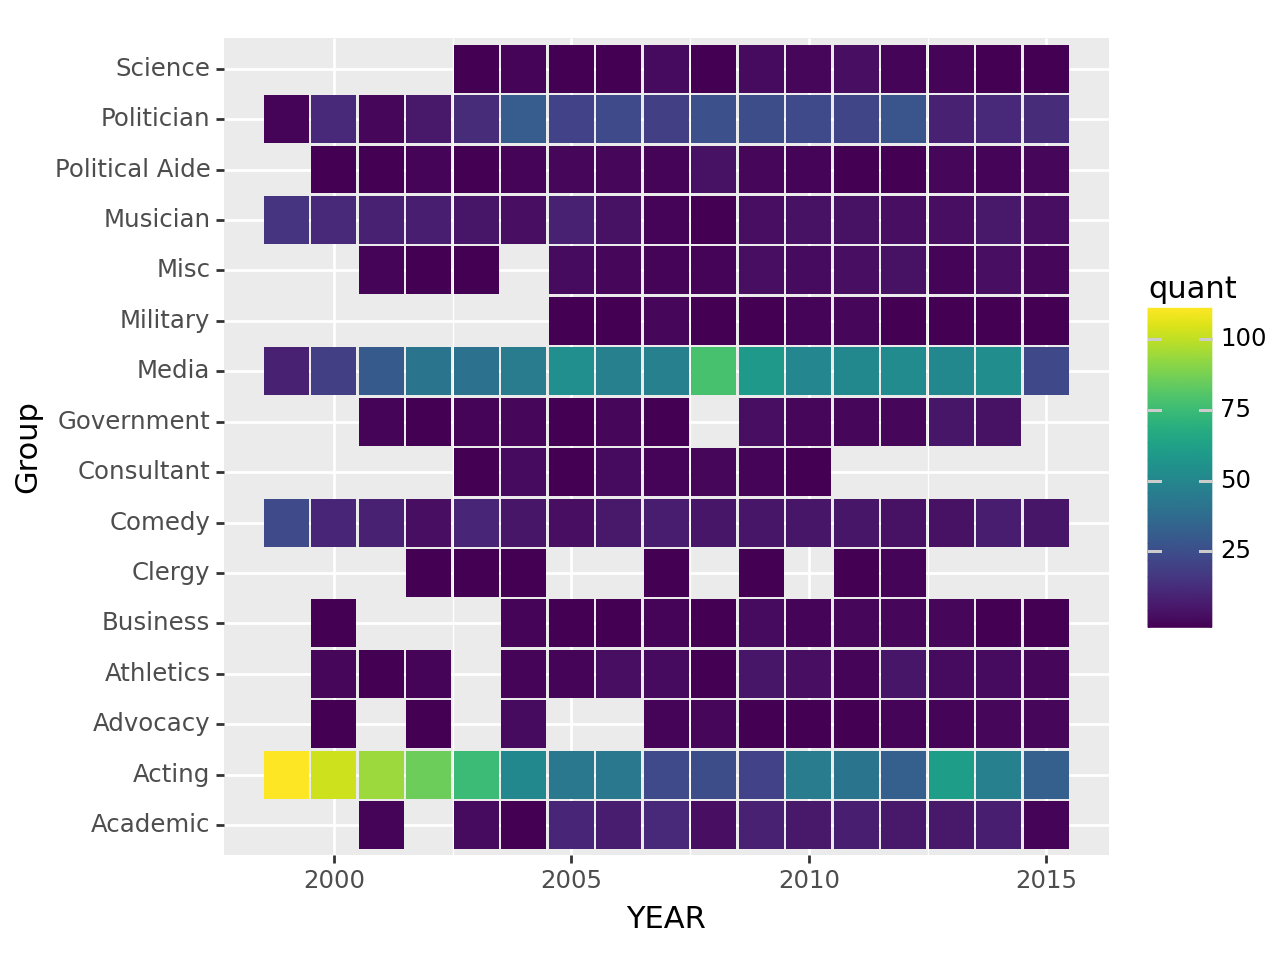

<Figure Size: (640 x 480)>

In [79]:
(ggplot(pd_crosstab, aes(y="Group", x="YEAR", fill="quant"))
 + geom_tile(aes(height=0.95, width=0.95)))

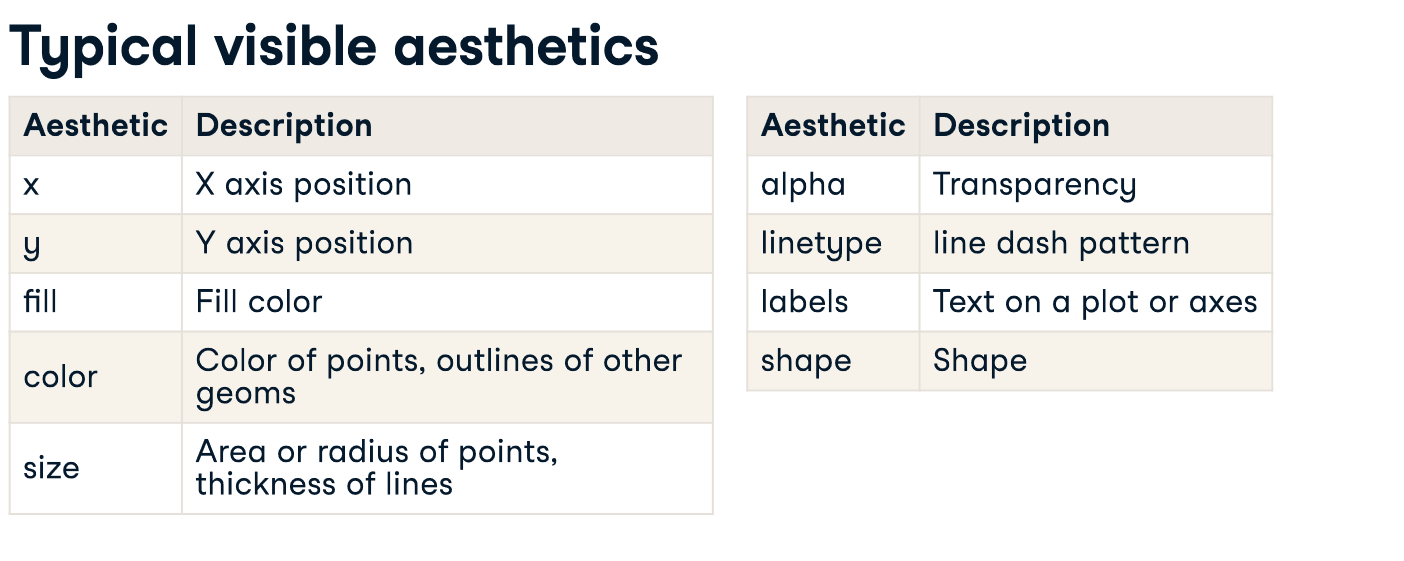

In [80]:
fifa.groupby("preferred_foot").agg({"age": "mean", "wage_eur": "mean"}).reset_index()

preferred_foot        age     wage_eur
0           Left  25.245902  9844.262295
1          Right  25.056886  7868.263473

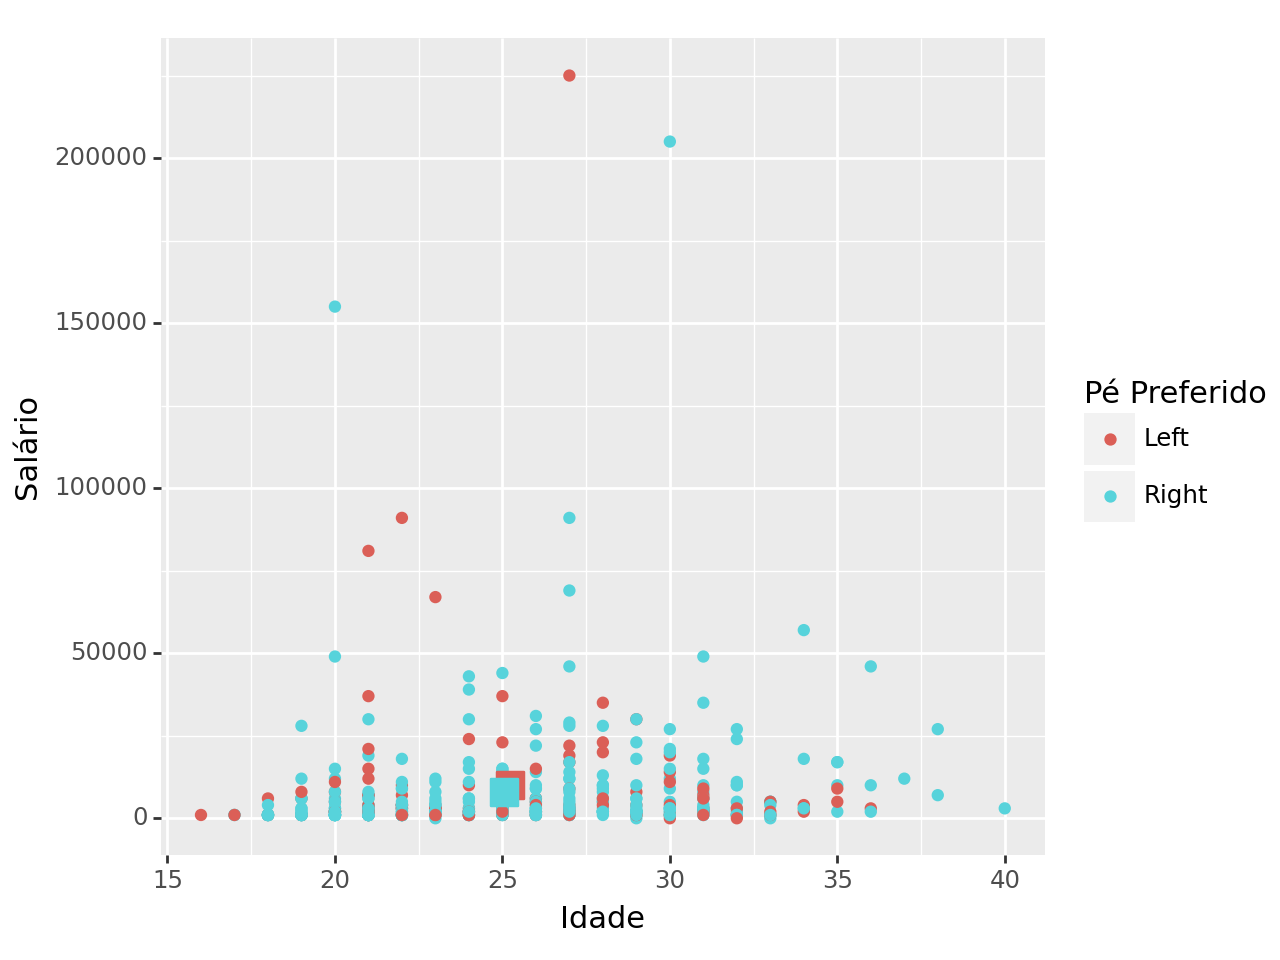

<Figure Size: (640 x 480)>

In [81]:
(ggplot(data = fifa)+  aes(x = "age", y = "wage_eur", color = "preferred_foot") + 
  geom_point()+ labs(x="Idade", y="Salário", color="Pé Preferido")+
  geom_point(data = fifa.groupby("preferred_foot").agg({"age": "mean", "wage_eur": "mean"}).reset_index(), shape=",", size=5))

## Descobrir
- Explorar os argumentos do theme: ticks, axis e legend(capítulo 4 curso 1)

# Estudar melhor o capítulo 4 do curso 1 de ggplot
## Terminar capítulo 3 do curso 2 de ggplot